In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import pulp

import sys
sys.path.insert(0, '../../..')
import leximin_assignment
import bottleneck_assignment
import assignment

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

import warnings

In [2]:
df = pd.read_csv('../../../data/data.csv', index_col=0)
types = ['ES', 'TH', 'RRH', 'PREV']
df = df[df['Real'] != 2]
df = df.drop(labels='PSH', axis=1)

df.shape

(13940, 7)

In [3]:
df.head()

,HouseholdID,Real,Reentered,ES,TH,RRH,PREV
6,200001080,1,1,0.781217,0.764820,0.754706,0.704289
7,200001139,5,1,0.570296,0.618977,0.634829,0.541514
8,200001156,5,0,0.274172,0.227518,0.225883,0.162229
9,200001169,5,1,0.589506,0.600307,0.599340,0.509780
10,200001171,5,1,0.638970,0.555111,0.585469,0.506257


In [4]:
capacity_df = df['Real'].value_counts()
capacity_df

5    6202
1    4441
3    2451
4     846
Name: Real, dtype: int64

In [5]:
increase_from_best_df = df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = df[type_] - increase_from_best_df['Best']
    
cost_matrix = df[types].to_numpy()
cost_matrix = (cost_matrix * 10 ** 9).round(0).astype(int)
increase_matrix = (increase_from_best_df[types].to_numpy() * 10 ** 9).round(0).astype(int)
capacities = capacity_df.sort_index().to_numpy()

print(cost_matrix.shape)
cost_matrix

(13940, 4)


array([[781217497, 764820278, 754705525, 704289144],
       [570296480, 618977105, 634828849, 541513653],
       [274172124, 227518497, 225882721, 162229324],
       ...,
       [547168618, 464714899, 519331945, 406558559],
       [462085596, 410795089, 437190352, 311884340],
       [198679886, 147321500, 167755823, 103371890]])

In [6]:
print(increase_matrix.shape)
increase_matrix

(13940, 4)


array([[ 76928353,  60531134,  50416381,         0],
       [ 28782827,  77463452,  93315196,         0],
       [111942800,  65289173,  63653397,         0],
       ...,
       [140610059,  58156340, 112773386,         0],
       [150201256,  98910749, 125306012,         0],
       [ 95307996,  43949610,  64383933,         0]])

In [ ]:
# Leximin assignment
leximin_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    increase_matrix, capacities)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    leximin_assignments = leximin_assigner.solve(verbose=True)

Running from the beginning...
Number of agents assigned: 0 / 13940
Current leximin: 220759901
Number of agents assigned: 1 / 13940
Current leximin: 75035181
Number of agents assigned: 2 / 13940
Current leximin: 75033994
Number of agents assigned: 3 / 13940
Current leximin: 75028873
Number of agents assigned: 4 / 13940
Current leximin: 75024648
Number of agents assigned: 5 / 13940
Current leximin: 75020858
Number of agents assigned: 6 / 13940
Current leximin: 75013831
Number of agents assigned: 7 / 13940
Current leximin: 75012762
Number of agents assigned: 8 / 13940
Current leximin: 75009023
Number of agents assigned: 9 / 13940
Current leximin: 75002030
Number of agents assigned: 10 / 13940
Current leximin: 74998653
Number of agents assigned: 11 / 13940
Current leximin: 74994351
Number of agents assigned: 12 / 13940
Current leximin: 74988100
Number of agents assigned: 13 / 13940
Current leximin: 74986836
Number of agents assigned: 14 / 13940
Current leximin: 74985758
Number of agents as

Number of agents assigned: 128 / 13940
Current leximin: 74398738
Number of agents assigned: 129 / 13940
Current leximin: 74398052
Number of agents assigned: 130 / 13940
Current leximin: 74387218
Number of agents assigned: 131 / 13940
Current leximin: 74384426
Number of agents assigned: 132 / 13940
Current leximin: 74374754
Number of agents assigned: 133 / 13940
Current leximin: 74351330
Number of agents assigned: 134 / 13940
Current leximin: 74344079
Number of agents assigned: 135 / 13940
Current leximin: 74341604
Number of agents assigned: 136 / 13940
Current leximin: 74339169
Number of agents assigned: 137 / 13940
Current leximin: 74334167
Number of agents assigned: 138 / 13940
Current leximin: 74330756
Number of agents assigned: 139 / 13940
Current leximin: 74327498
Number of agents assigned: 140 / 13940
Current leximin: 74323573
Number of agents assigned: 141 / 13940
Current leximin: 74319132
Number of agents assigned: 142 / 13940
Current leximin: 74313106
Number of agents assigned

# Old version

In [10]:
df = pd.read_csv('../../data/data.csv', index_col=0)
capacity_df = df['Real'].value_counts()
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

increase_from_best_df = df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = df[type_] - increase_from_best_df['Best']
    
cost_matrix = df[types].to_numpy()
cost_matrix = (cost_matrix * 10 ** 9).round(0).astype(int)
increase_matrix = (increase_from_best_df[types].to_numpy() * 10 ** 9).round(0).astype(int)
capacities = capacity_df.sort_index().to_numpy()

cost_matrix

array([[425008419, 271801284, 350017425, 397626039, 291636742],
       [327549783, 188743021, 266542956, 337443996, 218233669],
       [186973424, 760772184, 137804714, 178758793, 106167875],
       ...,
       [547168618, 259966675, 464714899, 519331945, 406558559],
       [462085596, 464714899, 410795089, 437190352, 311884340],
       [198679886, 147321500, 147321500, 167755823, 103371890]])

In [11]:
increase_matrix

array([[153207135,         0,  78216141, 125824755,  19835458],
       [138806762,         0,  77799935, 148700975,  29490648],
       [ 80805549, 654604309,  31636839,  72590918,         0],
       ...,
       [287201943,         0, 204748224, 259365270, 146591884],
       [150201256, 152830559,  98910749, 125306012,         0],
       [ 95307996,  43949610,  43949610,  64383933,         0]])

In [12]:
increase_matrix[increase_matrix == 432005575]

array([432005575])

In [3]:
# # Leximin assignment
# print('Computing leximin assignment')

# leximin_assigner = leximin_assignment.LeximinAssignmentHelperV3(
#     increase_matrix, capacities)
# with warnings.catch_warnings():
#     warnings.simplefilter('ignore')
#     leximin_assignments = leximin_assigner.solve(verbose=True)

Computing leximin assignment
Running from the beginning...
Number of agents assigned: 0 / 14211
Current leximin: 1
Number of agents assigned: 1 / 14211
Current leximin: 0.43200557499999986
Number of agents assigned: 2 / 14211
Current leximin: 0.431631701
Number of agents assigned: 3 / 14211
Current leximin: 0.431277594
Number of agents assigned: 4 / 14211
Current leximin: 0.4305189380000001
Number of agents assigned: 5 / 14211
Current leximin: 0.429681141
Number of agents assigned: 6 / 14211
Current leximin: 0.4294329650000001
Number of agents assigned: 7 / 14211
Current leximin: 0.42919149400000006
Number of agents assigned: 8 / 14211
Current leximin: 0.42918097399999994
Number of agents assigned: 9 / 14211
Current leximin: 0.429127463
Number of agents assigned: 10 / 14211
Current leximin: 0.428564143
Number of agents assigned: 11 / 14211
Current leximin: 0.427983826
Number of agents assigned: 12 / 14211
Current leximin: 0.427445584
Number of agents assigned: 13 / 14211
Current leximi

Number of agents assigned: 114 / 14211
Current leximin: 0.39854307600000005
Number of agents assigned: 115 / 14211
Current leximin: 0.398520836
Number of agents assigned: 116 / 14211
Current leximin: 0.39762919799999996
Number of agents assigned: 117 / 14211
Current leximin: 0.396508089
Number of agents assigned: 118 / 14211
Current leximin: 0.39609777299999993
Number of agents assigned: 119 / 14211
Current leximin: 0.39559118399999993
Number of agents assigned: 120 / 14211
Current leximin: 0.39555588500000005
Number of agents assigned: 121 / 14211
Current leximin: 0.394965396
Number of agents assigned: 122 / 14211
Current leximin: 0.394230226
Number of agents assigned: 123 / 14211
Current leximin: 0.39412147200000003
Number of agents assigned: 124 / 14211
Current leximin: 0.39408953599999996
Number of agents assigned: 125 / 14211
Current leximin: 0.39406465600000007
Number of agents assigned: 126 / 14211
Current leximin: 0.39401694200000004
Number of agents assigned: 127 / 14211
Curre

Number of agents assigned: 228 / 14211
Current leximin: 0.361813692
Number of agents assigned: 229 / 14211
Current leximin: 0.36167116199999993
Number of agents assigned: 230 / 14211
Current leximin: 0.361433548
Number of agents assigned: 231 / 14211
Current leximin: 0.361308384
Number of agents assigned: 232 / 14211
Current leximin: 0.36110264099999995
Number of agents assigned: 233 / 14211
Current leximin: 0.36099912399999995
Number of agents assigned: 234 / 14211
Current leximin: 0.36060745699999996
Number of agents assigned: 235 / 14211
Current leximin: 0.3604264790000001
Number of agents assigned: 236 / 14211
Current leximin: 0.360105201
Number of agents assigned: 237 / 14211
Current leximin: 0.35994047199999996
Number of agents assigned: 238 / 14211
Current leximin: 0.35917970400000004
Number of agents assigned: 239 / 14211
Current leximin: 0.35907016899999994
Number of agents assigned: 240 / 14211
Current leximin: 0.359035414
Number of agents assigned: 241 / 14211
Current leximi

Number of agents assigned: 342 / 14211
Current leximin: 0.3371762549999999
Number of agents assigned: 343 / 14211
Current leximin: 0.33650452200000003
Number of agents assigned: 344 / 14211
Current leximin: 0.33625570299999996
Number of agents assigned: 345 / 14211
Current leximin: 0.335901374
Number of agents assigned: 346 / 14211
Current leximin: 0.33540959699999995
Number of agents assigned: 347 / 14211
Current leximin: 0.335251281
Number of agents assigned: 348 / 14211
Current leximin: 0.335234203
Number of agents assigned: 349 / 14211
Current leximin: 0.3349980020000001
Number of agents assigned: 350 / 14211
Current leximin: 0.33475745700000004
Number of agents assigned: 351 / 14211
Current leximin: 0.33470713500000004
Number of agents assigned: 352 / 14211
Current leximin: 0.334185624
Number of agents assigned: 353 / 14211
Current leximin: 0.33416089900000007
Number of agents assigned: 354 / 14211
Current leximin: 0.333876143
Number of agents assigned: 355 / 14211
Current leximin

Number of agents assigned: 456 / 14211
Current leximin: 0.31349945700000004
Number of agents assigned: 457 / 14211
Current leximin: 0.313420119
Number of agents assigned: 458 / 14211
Current leximin: 0.313398092
Number of agents assigned: 459 / 14211
Current leximin: 0.313351814
Number of agents assigned: 460 / 14211
Current leximin: 0.31334428999999997
Number of agents assigned: 461 / 14211
Current leximin: 0.313158515
Number of agents assigned: 462 / 14211
Current leximin: 0.31286327699999994
Number of agents assigned: 463 / 14211
Current leximin: 0.312376333
Number of agents assigned: 464 / 14211
Current leximin: 0.31236244
Number of agents assigned: 465 / 14211
Current leximin: 0.312212569
Number of agents assigned: 466 / 14211
Current leximin: 0.312162265
Number of agents assigned: 467 / 14211
Current leximin: 0.312094297
Number of agents assigned: 468 / 14211
Current leximin: 0.312048445
Number of agents assigned: 469 / 14211
Current leximin: 0.31170546800000004
Number of agents 

Number of agents assigned: 571 / 14211
Current leximin: 0.2974345770000001
Number of agents assigned: 572 / 14211
Current leximin: 0.29731009199999997
Number of agents assigned: 573 / 14211
Current leximin: 0.29723988199999996
Number of agents assigned: 574 / 14211
Current leximin: 0.29722189900000007
Number of agents assigned: 575 / 14211
Current leximin: 0.297194015
Number of agents assigned: 576 / 14211
Current leximin: 0.2970604699999999
Number of agents assigned: 577 / 14211
Current leximin: 0.29702192800000005
Number of agents assigned: 578 / 14211
Current leximin: 0.29686053300000004
Number of agents assigned: 579 / 14211
Current leximin: 0.29679252899999997
Number of agents assigned: 580 / 14211
Current leximin: 0.296782075
Number of agents assigned: 581 / 14211
Current leximin: 0.29657766099999994
Number of agents assigned: 582 / 14211
Current leximin: 0.296344515
Number of agents assigned: 583 / 14211
Current leximin: 0.29611042499999995
Number of agents assigned: 584 / 14211

Number of agents assigned: 686 / 14211
Current leximin: 0.28422892
Number of agents assigned: 687 / 14211
Current leximin: 0.28417888
Number of agents assigned: 688 / 14211
Current leximin: 0.284072435
Number of agents assigned: 689 / 14211
Current leximin: 0.28390892599999995
Number of agents assigned: 690 / 14211
Current leximin: 0.28378184000000006
Number of agents assigned: 691 / 14211
Current leximin: 0.283613304
Number of agents assigned: 692 / 14211
Current leximin: 0.283608436
Number of agents assigned: 693 / 14211
Current leximin: 0.28324942799999997
Number of agents assigned: 694 / 14211
Current leximin: 0.2831512970000001
Number of agents assigned: 695 / 14211
Current leximin: 0.282923174
Number of agents assigned: 696 / 14211
Current leximin: 0.28289748
Number of agents assigned: 697 / 14211
Current leximin: 0.28273346000000005
Number of agents assigned: 698 / 14211
Current leximin: 0.28246776799999995
Number of agents assigned: 699 / 14211
Current leximin: 0.28241199300000

Number of agents assigned: 801 / 14211
Current leximin: 0.268478297
Number of agents assigned: 802 / 14211
Current leximin: 0.26836215399999996
Number of agents assigned: 803 / 14211
Current leximin: 0.268300984
Number of agents assigned: 804 / 14211
Current leximin: 0.2681856389999999
Number of agents assigned: 805 / 14211
Current leximin: 0.268008984
Number of agents assigned: 806 / 14211
Current leximin: 0.267620659
Number of agents assigned: 807 / 14211
Current leximin: 0.26720095
Number of agents assigned: 808 / 14211
Current leximin: 0.26714282199999995
Number of agents assigned: 809 / 14211
Current leximin: 0.26668439899999996
Number of agents assigned: 810 / 14211
Current leximin: 0.266560709
Number of agents assigned: 811 / 14211
Current leximin: 0.266444416
Number of agents assigned: 812 / 14211
Current leximin: 0.266322607
Number of agents assigned: 813 / 14211
Current leximin: 0.26628080400000004
Number of agents assigned: 814 / 14211
Current leximin: 0.26626532499999994
Nu

Number of agents assigned: 916 / 14211
Current leximin: 0.2528307369999999
Number of agents assigned: 917 / 14211
Current leximin: 0.252803645
Number of agents assigned: 918 / 14211
Current leximin: 0.2527509420000001
Number of agents assigned: 919 / 14211
Current leximin: 0.252715902
Number of agents assigned: 920 / 14211
Current leximin: 0.25256718499999997
Number of agents assigned: 921 / 14211
Current leximin: 0.25255724599999996
Number of agents assigned: 922 / 14211
Current leximin: 0.25241658299999997
Number of agents assigned: 923 / 14211
Current leximin: 0.252409446
Number of agents assigned: 924 / 14211
Current leximin: 0.25225618299999997
Number of agents assigned: 925 / 14211
Current leximin: 0.25222061800000006
Number of agents assigned: 926 / 14211
Current leximin: 0.252025961
Number of agents assigned: 927 / 14211
Current leximin: 0.2519273329999999
Number of agents assigned: 928 / 14211
Current leximin: 0.25191446600000006
Number of agents assigned: 929 / 14211
Current 

Number of agents assigned: 1028 / 14211
Current leximin: 0.242162885
Number of agents assigned: 1029 / 14211
Current leximin: 0.24211505699999997
Number of agents assigned: 1030 / 14211
Current leximin: 0.242099561
Number of agents assigned: 1031 / 14211
Current leximin: 0.242047004
Number of agents assigned: 1032 / 14211
Current leximin: 0.24184181099999996
Number of agents assigned: 1033 / 14211
Current leximin: 0.24181204500000006
Number of agents assigned: 1034 / 14211
Current leximin: 0.241710692
Number of agents assigned: 1035 / 14211
Current leximin: 0.241570225
Number of agents assigned: 1036 / 14211
Current leximin: 0.241489488
Number of agents assigned: 1037 / 14211
Current leximin: 0.24144577599999995
Number of agents assigned: 1038 / 14211
Current leximin: 0.24131064199999996
Number of agents assigned: 1039 / 14211
Current leximin: 0.24083937
Number of agents assigned: 1040 / 14211
Current leximin: 0.24051248600000005
Number of agents assigned: 1041 / 14211
Current leximin:

Number of agents assigned: 1139 / 14211
Current leximin: 0.23133402200000006
Number of agents assigned: 1140 / 14211
Current leximin: 0.23108670800000003
Number of agents assigned: 1141 / 14211
Current leximin: 0.23105267699999998
Number of agents assigned: 1142 / 14211
Current leximin: 0.23095197
Number of agents assigned: 1143 / 14211
Current leximin: 0.23094387300000002
Number of agents assigned: 1144 / 14211
Current leximin: 0.23092027299999995
Number of agents assigned: 1145 / 14211
Current leximin: 0.23085752099999995
Number of agents assigned: 1146 / 14211
Current leximin: 0.23080780599999995
Number of agents assigned: 1147 / 14211
Current leximin: 0.230802458
Number of agents assigned: 1148 / 14211
Current leximin: 0.23078004800000002
Number of agents assigned: 1149 / 14211
Current leximin: 0.230727652
Number of agents assigned: 1150 / 14211
Current leximin: 0.230723558
Number of agents assigned: 1151 / 14211
Current leximin: 0.23072249699999997
Number of agents assigned: 1152 

Number of agents assigned: 1250 / 14211
Current leximin: 0.21896960099999999
Number of agents assigned: 1251 / 14211
Current leximin: 0.2188176169999999
Number of agents assigned: 1252 / 14211
Current leximin: 0.21881200999999995
Number of agents assigned: 1253 / 14211
Current leximin: 0.21880314100000003
Number of agents assigned: 1254 / 14211
Current leximin: 0.21877336899999997
Number of agents assigned: 1255 / 14211
Current leximin: 0.21872497299999996
Number of agents assigned: 1256 / 14211
Current leximin: 0.21871017400000003
Number of agents assigned: 1257 / 14211
Current leximin: 0.21865109400000002
Number of agents assigned: 1258 / 14211
Current leximin: 0.218557604
Number of agents assigned: 1259 / 14211
Current leximin: 0.21848678
Number of agents assigned: 1260 / 14211
Current leximin: 0.21827353600000002
Number of agents assigned: 1261 / 14211
Current leximin: 0.218257581
Number of agents assigned: 1262 / 14211
Current leximin: 0.21821843900000001
Number of agents assigned

Number of agents assigned: 1361 / 14211
Current leximin: 0.210186732
Number of agents assigned: 1362 / 14211
Current leximin: 0.20993521200000007
Number of agents assigned: 1363 / 14211
Current leximin: 0.209838791
Number of agents assigned: 1364 / 14211
Current leximin: 0.20969392599999997
Number of agents assigned: 1365 / 14211
Current leximin: 0.209613098
Number of agents assigned: 1366 / 14211
Current leximin: 0.20959996999999997
Number of agents assigned: 1367 / 14211
Current leximin: 0.20954037200000003
Number of agents assigned: 1368 / 14211
Current leximin: 0.20939569500000002
Number of agents assigned: 1369 / 14211
Current leximin: 0.209322948
Number of agents assigned: 1370 / 14211
Current leximin: 0.209209808
Number of agents assigned: 1371 / 14211
Current leximin: 0.20908032199999999
Number of agents assigned: 1372 / 14211
Current leximin: 0.20904514199999996
Number of agents assigned: 1373 / 14211
Current leximin: 0.20859231700000003
Number of agents assigned: 1374 / 14211

Number of agents assigned: 1472 / 14211
Current leximin: 0.19933727999999998
Number of agents assigned: 1473 / 14211
Current leximin: 0.19924432199999997
Number of agents assigned: 1474 / 14211
Current leximin: 0.19916006800000002
Number of agents assigned: 1475 / 14211
Current leximin: 0.19905520799999998
Number of agents assigned: 1476 / 14211
Current leximin: 0.19881295599999996
Number of agents assigned: 1477 / 14211
Current leximin: 0.19880428200000005
Number of agents assigned: 1478 / 14211
Current leximin: 0.19880370299999997
Number of agents assigned: 1479 / 14211
Current leximin: 0.19859595199999996
Number of agents assigned: 1480 / 14211
Current leximin: 0.198434818
Number of agents assigned: 1481 / 14211
Current leximin: 0.198389528
Number of agents assigned: 1482 / 14211
Current leximin: 0.19822629299999997
Number of agents assigned: 1483 / 14211
Current leximin: 0.198065078
Number of agents assigned: 1484 / 14211
Current leximin: 0.197907375
Number of agents assigned: 1485

Number of agents assigned: 1582 / 14211
Current leximin: 0.18894118699999995
Number of agents assigned: 1583 / 14211
Current leximin: 0.18889946600000002
Number of agents assigned: 1584 / 14211
Current leximin: 0.188532769
Number of agents assigned: 1585 / 14211
Current leximin: 0.18843752999999996
Number of agents assigned: 1586 / 14211
Current leximin: 0.18843718100000004
Number of agents assigned: 1587 / 14211
Current leximin: 0.18826078599999999
Number of agents assigned: 1588 / 14211
Current leximin: 0.18824275600000004
Number of agents assigned: 1589 / 14211
Current leximin: 0.18810423499999995
Number of agents assigned: 1590 / 14211
Current leximin: 0.18808144499999996
Number of agents assigned: 1591 / 14211
Current leximin: 0.187932817
Number of agents assigned: 1592 / 14211
Current leximin: 0.18793042399999998
Number of agents assigned: 1593 / 14211
Current leximin: 0.187591191
Number of agents assigned: 1594 / 14211
Current leximin: 0.18758895100000006
Number of agents assign

Number of agents assigned: 1693 / 14211
Current leximin: 0.17954765499999997
Number of agents assigned: 1694 / 14211
Current leximin: 0.17948836199999998
Number of agents assigned: 1695 / 14211
Current leximin: 0.17944592599999998
Number of agents assigned: 1696 / 14211
Current leximin: 0.179399502
Number of agents assigned: 1697 / 14211
Current leximin: 0.179393404
Number of agents assigned: 1698 / 14211
Current leximin: 0.17936075199999996
Number of agents assigned: 1699 / 14211
Current leximin: 0.17932864200000004
Number of agents assigned: 1700 / 14211
Current leximin: 0.179244503
Number of agents assigned: 1701 / 14211
Current leximin: 0.17921536200000002
Number of agents assigned: 1702 / 14211
Current leximin: 0.17918599699999999
Number of agents assigned: 1703 / 14211
Current leximin: 0.179081212
Number of agents assigned: 1704 / 14211
Current leximin: 0.17897913000000007
Number of agents assigned: 1705 / 14211
Current leximin: 0.17881636900000003
Number of agents assigned: 1706

Number of agents assigned: 1803 / 14211
Current leximin: 0.17167198400000003
Number of agents assigned: 1804 / 14211
Current leximin: 0.17163755700000005
Number of agents assigned: 1805 / 14211
Current leximin: 0.171590476
Number of agents assigned: 1806 / 14211
Current leximin: 0.171562843
Number of agents assigned: 1807 / 14211
Current leximin: 0.171536888
Number of agents assigned: 1808 / 14211
Current leximin: 0.17152915399999996
Number of agents assigned: 1809 / 14211
Current leximin: 0.17149888199999996
Number of agents assigned: 1810 / 14211
Current leximin: 0.171473888
Number of agents assigned: 1811 / 14211
Current leximin: 0.17146019099999998
Number of agents assigned: 1812 / 14211
Current leximin: 0.171384585
Number of agents assigned: 1813 / 14211
Current leximin: 0.17135261599999996
Number of agents assigned: 1814 / 14211
Current leximin: 0.17131195200000005
Number of agents assigned: 1815 / 14211
Current leximin: 0.17130132699999995
Number of agents assigned: 1816 / 14211

Number of agents assigned: 1914 / 14211
Current leximin: 0.165264962
Number of agents assigned: 1915 / 14211
Current leximin: 0.16505177300000004
Number of agents assigned: 1916 / 14211
Current leximin: 0.164975863
Number of agents assigned: 1917 / 14211
Current leximin: 0.16494538900000003
Number of agents assigned: 1918 / 14211
Current leximin: 0.16494469500000003
Number of agents assigned: 1919 / 14211
Current leximin: 0.16491822199999995
Number of agents assigned: 1920 / 14211
Current leximin: 0.16490995599999997
Number of agents assigned: 1921 / 14211
Current leximin: 0.164750972
Number of agents assigned: 1922 / 14211
Current leximin: 0.16474606399999997
Number of agents assigned: 1923 / 14211
Current leximin: 0.16473652700000002
Number of agents assigned: 1924 / 14211
Current leximin: 0.16466879999999998
Number of agents assigned: 1925 / 14211
Current leximin: 0.16460609699999998
Number of agents assigned: 1926 / 14211
Current leximin: 0.164605181
Number of agents assigned: 1927

Number of agents assigned: 2028 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2029 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2030 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2031 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2032 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2033 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2034 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2035 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2036 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2037 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2038 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2039 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2040 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2041 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2042 / 14211
Current 

Number of agents assigned: 2149 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2150 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2151 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2152 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2153 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2154 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2155 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2156 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2157 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2158 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2159 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2160 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2161 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2162 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2163 / 14211
Current 

Number of agents assigned: 2270 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2271 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2272 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2273 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2274 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2275 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2276 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2277 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2278 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2279 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2280 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2281 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2282 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2283 / 14211
Current leximin: 0.16060153
Number of agents assigned: 2284 / 14211
Current 

In [13]:
# Leximin assignment
leximin_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    increase_matrix, capacities)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    leximin_assignments = leximin_assigner.solve(verbose=True)

Running from the beginning...
Number of agents assigned: 0 / 14211
Current leximin: 801554275
Number of agents assigned: 1 / 14211
Current leximin: 432005575
Number of agents assigned: 2 / 14211
Current leximin: 431631701
Number of agents assigned: 3 / 14211
Current leximin: 431277594
Number of agents assigned: 4 / 14211
Current leximin: 430518938
Number of agents assigned: 5 / 14211
Current leximin: 429681141
Number of agents assigned: 6 / 14211
Current leximin: 429432965
Number of agents assigned: 7 / 14211
Current leximin: 429191494
Number of agents assigned: 8 / 14211
Current leximin: 429180974
Number of agents assigned: 9 / 14211
Current leximin: 429127463
Number of agents assigned: 10 / 14211
Current leximin: 428564143
Number of agents assigned: 11 / 14211
Current leximin: 427983826
Number of agents assigned: 12 / 14211
Current leximin: 427445584
Number of agents assigned: 13 / 14211
Current leximin: 427417089
Number of agents assigned: 14 / 14211
Current leximin: 426953764
Numbe

Number of agents assigned: 126 / 14211
Current leximin: 394016942
Number of agents assigned: 127 / 14211
Current leximin: 393100720
Number of agents assigned: 128 / 14211
Current leximin: 393078964
Number of agents assigned: 129 / 14211
Current leximin: 392858345
Number of agents assigned: 130 / 14211
Current leximin: 392517667
Number of agents assigned: 131 / 14211
Current leximin: 392331417
Number of agents assigned: 132 / 14211
Current leximin: 392239336
Number of agents assigned: 133 / 14211
Current leximin: 392159586
Number of agents assigned: 134 / 14211
Current leximin: 391384996
Number of agents assigned: 135 / 14211
Current leximin: 390975479
Number of agents assigned: 136 / 14211
Current leximin: 390948219
Number of agents assigned: 137 / 14211
Current leximin: 390451905
Number of agents assigned: 138 / 14211
Current leximin: 390440137
Number of agents assigned: 139 / 14211
Current leximin: 389092472
Number of agents assigned: 140 / 14211
Current leximin: 388927810
Number of 

Number of agents assigned: 251 / 14211
Current leximin: 356583484
Number of agents assigned: 252 / 14211
Current leximin: 356555784
Number of agents assigned: 253 / 14211
Current leximin: 356455824
Number of agents assigned: 254 / 14211
Current leximin: 356306690
Number of agents assigned: 255 / 14211
Current leximin: 356297830
Number of agents assigned: 256 / 14211
Current leximin: 356194534
Number of agents assigned: 257 / 14211
Current leximin: 355974691
Number of agents assigned: 258 / 14211
Current leximin: 355454750
Number of agents assigned: 259 / 14211
Current leximin: 355404673
Number of agents assigned: 260 / 14211
Current leximin: 355180260
Number of agents assigned: 261 / 14211
Current leximin: 355073829
Number of agents assigned: 262 / 14211
Current leximin: 354714731
Number of agents assigned: 263 / 14211
Current leximin: 354571125
Number of agents assigned: 264 / 14211
Current leximin: 354307921
Number of agents assigned: 265 / 14211
Current leximin: 354226137
Number of 

Number of agents assigned: 376 / 14211
Current leximin: 329261464
Number of agents assigned: 377 / 14211
Current leximin: 328840144
Number of agents assigned: 378 / 14211
Current leximin: 328309938
Number of agents assigned: 379 / 14211
Current leximin: 327991026
Number of agents assigned: 380 / 14211
Current leximin: 327907978
Number of agents assigned: 381 / 14211
Current leximin: 327597196
Number of agents assigned: 382 / 14211
Current leximin: 327575682
Number of agents assigned: 383 / 14211
Current leximin: 327498935
Number of agents assigned: 384 / 14211
Current leximin: 327358310
Number of agents assigned: 385 / 14211
Current leximin: 327303984
Number of agents assigned: 386 / 14211
Current leximin: 327302180
Number of agents assigned: 387 / 14211
Current leximin: 327250266
Number of agents assigned: 388 / 14211
Current leximin: 327058905
Number of agents assigned: 389 / 14211
Current leximin: 326759371
Number of agents assigned: 390 / 14211
Current leximin: 326603906
Number of 

Number of agents assigned: 501 / 14211
Current leximin: 306878585
Number of agents assigned: 502 / 14211
Current leximin: 306719053
Number of agents assigned: 503 / 14211
Current leximin: 306662408
Number of agents assigned: 504 / 14211
Current leximin: 306597642
Number of agents assigned: 505 / 14211
Current leximin: 306560652
Number of agents assigned: 506 / 14211
Current leximin: 306397894
Number of agents assigned: 507 / 14211
Current leximin: 306319152
Number of agents assigned: 508 / 14211
Current leximin: 306142295
Number of agents assigned: 509 / 14211
Current leximin: 305721280
Number of agents assigned: 510 / 14211
Current leximin: 305710912
Number of agents assigned: 511 / 14211
Current leximin: 305447916
Number of agents assigned: 512 / 14211
Current leximin: 305368603
Number of agents assigned: 513 / 14211
Current leximin: 305304819
Number of agents assigned: 514 / 14211
Current leximin: 305264006
Number of agents assigned: 515 / 14211
Current leximin: 305210026
Number of 

Number of agents assigned: 626 / 14211
Current leximin: 290655697
Number of agents assigned: 627 / 14211
Current leximin: 290589063
Number of agents assigned: 628 / 14211
Current leximin: 290407281
Number of agents assigned: 629 / 14211
Current leximin: 290203236
Number of agents assigned: 630 / 14211
Current leximin: 290165947
Number of agents assigned: 631 / 14211
Current leximin: 290118024
Number of agents assigned: 632 / 14211
Current leximin: 290039971
Number of agents assigned: 633 / 14211
Current leximin: 289930989
Number of agents assigned: 634 / 14211
Current leximin: 289887330
Number of agents assigned: 635 / 14211
Current leximin: 289746986
Number of agents assigned: 636 / 14211
Current leximin: 289663835
Number of agents assigned: 637 / 14211
Current leximin: 289607321
Number of agents assigned: 638 / 14211
Current leximin: 289598476
Number of agents assigned: 639 / 14211
Current leximin: 289406874
Number of agents assigned: 640 / 14211
Current leximin: 289280081
Number of 

Number of agents assigned: 751 / 14211
Current leximin: 275881530
Number of agents assigned: 752 / 14211
Current leximin: 275876678
Number of agents assigned: 753 / 14211
Current leximin: 275744890
Number of agents assigned: 754 / 14211
Current leximin: 275619598
Number of agents assigned: 755 / 14211
Current leximin: 275611643
Number of agents assigned: 756 / 14211
Current leximin: 275398395
Number of agents assigned: 757 / 14211
Current leximin: 275117181
Number of agents assigned: 758 / 14211
Current leximin: 274963752
Number of agents assigned: 759 / 14211
Current leximin: 274925726
Number of agents assigned: 760 / 14211
Current leximin: 274837064
Number of agents assigned: 761 / 14211
Current leximin: 274481184
Number of agents assigned: 762 / 14211
Current leximin: 274375985
Number of agents assigned: 763 / 14211
Current leximin: 274365125
Number of agents assigned: 764 / 14211
Current leximin: 274338935
Number of agents assigned: 765 / 14211
Current leximin: 274161865
Number of 

Number of agents assigned: 876 / 14211
Current leximin: 257447604
Number of agents assigned: 877 / 14211
Current leximin: 257263810
Number of agents assigned: 878 / 14211
Current leximin: 257252506
Number of agents assigned: 879 / 14211
Current leximin: 257052573
Number of agents assigned: 880 / 14211
Current leximin: 257030242
Number of agents assigned: 881 / 14211
Current leximin: 256973692
Number of agents assigned: 882 / 14211
Current leximin: 256877574
Number of agents assigned: 883 / 14211
Current leximin: 256638303
Number of agents assigned: 884 / 14211
Current leximin: 256556352
Number of agents assigned: 885 / 14211
Current leximin: 256463523
Number of agents assigned: 886 / 14211
Current leximin: 256334174
Number of agents assigned: 887 / 14211
Current leximin: 256171378
Number of agents assigned: 888 / 14211
Current leximin: 255841430
Number of agents assigned: 889 / 14211
Current leximin: 255667841
Number of agents assigned: 890 / 14211
Current leximin: 255495652
Number of 

Number of agents assigned: 1001 / 14211
Current leximin: 244574653
Number of agents assigned: 1002 / 14211
Current leximin: 244561611
Number of agents assigned: 1003 / 14211
Current leximin: 244147840
Number of agents assigned: 1004 / 14211
Current leximin: 244024509
Number of agents assigned: 1005 / 14211
Current leximin: 243866527
Number of agents assigned: 1006 / 14211
Current leximin: 243777759
Number of agents assigned: 1007 / 14211
Current leximin: 243721432
Number of agents assigned: 1008 / 14211
Current leximin: 243685871
Number of agents assigned: 1009 / 14211
Current leximin: 243645574
Number of agents assigned: 1010 / 14211
Current leximin: 243589133
Number of agents assigned: 1011 / 14211
Current leximin: 243521621
Number of agents assigned: 1012 / 14211
Current leximin: 243515025
Number of agents assigned: 1013 / 14211
Current leximin: 243493682
Number of agents assigned: 1014 / 14211
Current leximin: 243420040
Number of agents assigned: 1015 / 14211
Current leximin: 24332

Number of agents assigned: 1124 / 14211
Current leximin: 233249836
Number of agents assigned: 1125 / 14211
Current leximin: 233106174
Number of agents assigned: 1126 / 14211
Current leximin: 232892147
Number of agents assigned: 1127 / 14211
Current leximin: 232847592
Number of agents assigned: 1128 / 14211
Current leximin: 232716454
Number of agents assigned: 1129 / 14211
Current leximin: 232525534
Number of agents assigned: 1130 / 14211
Current leximin: 232372389
Number of agents assigned: 1131 / 14211
Current leximin: 232274495
Number of agents assigned: 1132 / 14211
Current leximin: 232231085
Number of agents assigned: 1133 / 14211
Current leximin: 232143731
Number of agents assigned: 1134 / 14211
Current leximin: 232042939
Number of agents assigned: 1135 / 14211
Current leximin: 231881595
Number of agents assigned: 1136 / 14211
Current leximin: 231722336
Number of agents assigned: 1137 / 14211
Current leximin: 231477039
Number of agents assigned: 1138 / 14211
Current leximin: 23143

Number of agents assigned: 1247 / 14211
Current leximin: 219105751
Number of agents assigned: 1248 / 14211
Current leximin: 219053988
Number of agents assigned: 1249 / 14211
Current leximin: 219012735
Number of agents assigned: 1250 / 14211
Current leximin: 218969601
Number of agents assigned: 1251 / 14211
Current leximin: 218817617
Number of agents assigned: 1252 / 14211
Current leximin: 218812010
Number of agents assigned: 1253 / 14211
Current leximin: 218803141
Number of agents assigned: 1254 / 14211
Current leximin: 218773369
Number of agents assigned: 1255 / 14211
Current leximin: 218724973
Number of agents assigned: 1256 / 14211
Current leximin: 218710174
Number of agents assigned: 1257 / 14211
Current leximin: 218651094
Number of agents assigned: 1258 / 14211
Current leximin: 218557604
Number of agents assigned: 1259 / 14211
Current leximin: 218486780
Number of agents assigned: 1260 / 14211
Current leximin: 218273536
Number of agents assigned: 1261 / 14211
Current leximin: 21825

Number of agents assigned: 1370 / 14211
Current leximin: 209209808
Number of agents assigned: 1371 / 14211
Current leximin: 209080322
Number of agents assigned: 1372 / 14211
Current leximin: 209045142
Number of agents assigned: 1373 / 14211
Current leximin: 208592317
Number of agents assigned: 1374 / 14211
Current leximin: 208575078
Number of agents assigned: 1375 / 14211
Current leximin: 208174169
Number of agents assigned: 1376 / 14211
Current leximin: 208136050
Number of agents assigned: 1377 / 14211
Current leximin: 208110465
Number of agents assigned: 1378 / 14211
Current leximin: 208091006
Number of agents assigned: 1379 / 14211
Current leximin: 207853718
Number of agents assigned: 1380 / 14211
Current leximin: 207797868
Number of agents assigned: 1381 / 14211
Current leximin: 207512912
Number of agents assigned: 1382 / 14211
Current leximin: 207322705
Number of agents assigned: 1383 / 14211
Current leximin: 207263825
Number of agents assigned: 1384 / 14211
Current leximin: 20725

Number of agents assigned: 1493 / 14211
Current leximin: 197370746
Number of agents assigned: 1494 / 14211
Current leximin: 197277982
Number of agents assigned: 1495 / 14211
Current leximin: 197261922
Number of agents assigned: 1496 / 14211
Current leximin: 197172182
Number of agents assigned: 1497 / 14211
Current leximin: 197165904
Number of agents assigned: 1498 / 14211
Current leximin: 197158133
Number of agents assigned: 1499 / 14211
Current leximin: 197109361
Number of agents assigned: 1500 / 14211
Current leximin: 197058044
Number of agents assigned: 1501 / 14211
Current leximin: 196871820
Number of agents assigned: 1502 / 14211
Current leximin: 196811929
Number of agents assigned: 1503 / 14211
Current leximin: 196676127
Number of agents assigned: 1504 / 14211
Current leximin: 196623937
Number of agents assigned: 1505 / 14211
Current leximin: 196556698
Number of agents assigned: 1506 / 14211
Current leximin: 196516066
Number of agents assigned: 1507 / 14211
Current leximin: 19628

Number of agents assigned: 1616 / 14211
Current leximin: 185848984
Number of agents assigned: 1617 / 14211
Current leximin: 185524330
Number of agents assigned: 1618 / 14211
Current leximin: 185328820
Number of agents assigned: 1619 / 14211
Current leximin: 185171955
Number of agents assigned: 1620 / 14211
Current leximin: 185110496
Number of agents assigned: 1621 / 14211
Current leximin: 185106968
Number of agents assigned: 1622 / 14211
Current leximin: 185009908
Number of agents assigned: 1623 / 14211
Current leximin: 184996496
Number of agents assigned: 1624 / 14211
Current leximin: 184911986
Number of agents assigned: 1625 / 14211
Current leximin: 184910679
Number of agents assigned: 1626 / 14211
Current leximin: 184902225
Number of agents assigned: 1627 / 14211
Current leximin: 184870531
Number of agents assigned: 1628 / 14211
Current leximin: 184867066
Number of agents assigned: 1629 / 14211
Current leximin: 184677006
Number of agents assigned: 1630 / 14211
Current leximin: 18465

Number of agents assigned: 1739 / 14211
Current leximin: 175789190
Number of agents assigned: 1740 / 14211
Current leximin: 175775328
Number of agents assigned: 1741 / 14211
Current leximin: 175707972
Number of agents assigned: 1742 / 14211
Current leximin: 175576292
Number of agents assigned: 1743 / 14211
Current leximin: 175458597
Number of agents assigned: 1744 / 14211
Current leximin: 175439683
Number of agents assigned: 1745 / 14211
Current leximin: 175376075
Number of agents assigned: 1746 / 14211
Current leximin: 175335554
Number of agents assigned: 1747 / 14211
Current leximin: 175226497
Number of agents assigned: 1748 / 14211
Current leximin: 175093401
Number of agents assigned: 1749 / 14211
Current leximin: 174957424
Number of agents assigned: 1750 / 14211
Current leximin: 174803306
Number of agents assigned: 1751 / 14211
Current leximin: 174793843
Number of agents assigned: 1752 / 14211
Current leximin: 174667105
Number of agents assigned: 1753 / 14211
Current leximin: 17466

Number of agents assigned: 1862 / 14211
Current leximin: 168571913
Number of agents assigned: 1863 / 14211
Current leximin: 168547013
Number of agents assigned: 1864 / 14211
Current leximin: 168519391
Number of agents assigned: 1865 / 14211
Current leximin: 168474319
Number of agents assigned: 1866 / 14211
Current leximin: 168473877
Number of agents assigned: 1867 / 14211
Current leximin: 168457249
Number of agents assigned: 1868 / 14211
Current leximin: 168448266
Number of agents assigned: 1869 / 14211
Current leximin: 168434120
Number of agents assigned: 1870 / 14211
Current leximin: 168381489
Number of agents assigned: 1871 / 14211
Current leximin: 168339736
Number of agents assigned: 1872 / 14211
Current leximin: 168279295
Number of agents assigned: 1873 / 14211
Current leximin: 168270057
Number of agents assigned: 1874 / 14211
Current leximin: 168074868
Number of agents assigned: 1875 / 14211
Current leximin: 168062630
Number of agents assigned: 1876 / 14211
Current leximin: 16804

Number of agents assigned: 1985 / 14211
Current leximin: 161019690
Number of agents assigned: 1986 / 14211
Current leximin: 160985774
Number of agents assigned: 1987 / 14211
Current leximin: 160985592
Number of agents assigned: 1988 / 14211
Current leximin: 160905671
Number of agents assigned: 1989 / 14211
Current leximin: 160862910
Number of agents assigned: 1990 / 14211
Current leximin: 160799512
Number of agents assigned: 1991 / 14211
Current leximin: 160739264
Number of agents assigned: 1992 / 14211
Current leximin: 160726234
Number of agents assigned: 1993 / 14211
Current leximin: 160721610
Number of agents assigned: 1994 / 14211
Current leximin: 160601688
Number of agents assigned: 1995 / 14211
Current leximin: 160601530
Number of agents assigned: 1996 / 14211
Current leximin: 160578558
Number of agents assigned: 1997 / 14211
Current leximin: 160462948
Number of agents assigned: 1998 / 14211
Current leximin: 160245534
Number of agents assigned: 1999 / 14211
Current leximin: 16022

Number of agents assigned: 2108 / 14211
Current leximin: 153346088
Number of agents assigned: 2109 / 14211
Current leximin: 153335253
Number of agents assigned: 2110 / 14211
Current leximin: 153324814
Number of agents assigned: 2111 / 14211
Current leximin: 153306785
Number of agents assigned: 2112 / 14211
Current leximin: 153258818
Number of agents assigned: 2113 / 14211
Current leximin: 153228775
Number of agents assigned: 2114 / 14211
Current leximin: 153215758
Number of agents assigned: 2115 / 14211
Current leximin: 153127319
Number of agents assigned: 2116 / 14211
Current leximin: 153055551
Number of agents assigned: 2117 / 14211
Current leximin: 153014073
Number of agents assigned: 2118 / 14211
Current leximin: 153000907
Number of agents assigned: 2119 / 14211
Current leximin: 152986530
Number of agents assigned: 2120 / 14211
Current leximin: 152970264
Number of agents assigned: 2121 / 14211
Current leximin: 152944947
Number of agents assigned: 2122 / 14211
Current leximin: 15293

Number of agents assigned: 2231 / 14211
Current leximin: 145772073
Number of agents assigned: 2232 / 14211
Current leximin: 145768921
Number of agents assigned: 2233 / 14211
Current leximin: 145743398
Number of agents assigned: 2234 / 14211
Current leximin: 145727121
Number of agents assigned: 2235 / 14211
Current leximin: 145700095
Number of agents assigned: 2236 / 14211
Current leximin: 145691228
Number of agents assigned: 2237 / 14211
Current leximin: 145565864
Number of agents assigned: 2238 / 14211
Current leximin: 145534516
Number of agents assigned: 2239 / 14211
Current leximin: 145534133
Number of agents assigned: 2240 / 14211
Current leximin: 145473208
Number of agents assigned: 2241 / 14211
Current leximin: 145452669
Number of agents assigned: 2242 / 14211
Current leximin: 145386049
Number of agents assigned: 2243 / 14211
Current leximin: 145369805
Number of agents assigned: 2244 / 14211
Current leximin: 145369119
Number of agents assigned: 2245 / 14211
Current leximin: 14533

Number of agents assigned: 2354 / 14211
Current leximin: 137439738
Number of agents assigned: 2355 / 14211
Current leximin: 137383169
Number of agents assigned: 2356 / 14211
Current leximin: 137340257
Number of agents assigned: 2357 / 14211
Current leximin: 137314325
Number of agents assigned: 2358 / 14211
Current leximin: 137296327
Number of agents assigned: 2359 / 14211
Current leximin: 137293212
Number of agents assigned: 2360 / 14211
Current leximin: 137230460
Number of agents assigned: 2361 / 14211
Current leximin: 137172818
Number of agents assigned: 2362 / 14211
Current leximin: 137055782
Number of agents assigned: 2363 / 14211
Current leximin: 137046639
Number of agents assigned: 2364 / 14211
Current leximin: 137033575
Number of agents assigned: 2365 / 14211
Current leximin: 137029637
Number of agents assigned: 2366 / 14211
Current leximin: 136943598
Number of agents assigned: 2367 / 14211
Current leximin: 136717042
Number of agents assigned: 2368 / 14211
Current leximin: 13665

Number of agents assigned: 2477 / 14211
Current leximin: 130889107
Number of agents assigned: 2478 / 14211
Current leximin: 130849809
Number of agents assigned: 2479 / 14211
Current leximin: 130785447
Number of agents assigned: 2480 / 14211
Current leximin: 130740215
Number of agents assigned: 2481 / 14211
Current leximin: 130622669
Number of agents assigned: 2482 / 14211
Current leximin: 130577465
Number of agents assigned: 2483 / 14211
Current leximin: 130546891
Number of agents assigned: 2484 / 14211
Current leximin: 130545528
Number of agents assigned: 2485 / 14211
Current leximin: 130492608
Number of agents assigned: 2486 / 14211
Current leximin: 130489868
Number of agents assigned: 2487 / 14211
Current leximin: 130485350
Number of agents assigned: 2488 / 14211
Current leximin: 130281537
Number of agents assigned: 2489 / 14211
Current leximin: 130265946
Number of agents assigned: 2490 / 14211
Current leximin: 130255241
Number of agents assigned: 2491 / 14211
Current leximin: 13014

Number of agents assigned: 2600 / 14211
Current leximin: 124649067
Number of agents assigned: 2601 / 14211
Current leximin: 124584771
Number of agents assigned: 2602 / 14211
Current leximin: 124486506
Number of agents assigned: 2603 / 14211
Current leximin: 124475887
Number of agents assigned: 2604 / 14211
Current leximin: 124468199
Number of agents assigned: 2605 / 14211
Current leximin: 124424280
Number of agents assigned: 2606 / 14211
Current leximin: 124423880
Number of agents assigned: 2607 / 14211
Current leximin: 124417728
Number of agents assigned: 2608 / 14211
Current leximin: 124042077
Number of agents assigned: 2609 / 14211
Current leximin: 123717078
Number of agents assigned: 2610 / 14211
Current leximin: 123672134
Number of agents assigned: 2611 / 14211
Current leximin: 123664777
Number of agents assigned: 2612 / 14211
Current leximin: 123663292
Number of agents assigned: 2613 / 14211
Current leximin: 123610015
Number of agents assigned: 2614 / 14211
Current leximin: 12358

Number of agents assigned: 2723 / 14211
Current leximin: 117604153
Number of agents assigned: 2724 / 14211
Current leximin: 117595910
Number of agents assigned: 2725 / 14211
Current leximin: 117216621
Number of agents assigned: 2726 / 14211
Current leximin: 117128297
Number of agents assigned: 2727 / 14211
Current leximin: 117077453
Number of agents assigned: 2728 / 14211
Current leximin: 116989008
Number of agents assigned: 2729 / 14211
Current leximin: 116881777
Number of agents assigned: 2730 / 14211
Current leximin: 116835439
Number of agents assigned: 2731 / 14211
Current leximin: 116832353
Number of agents assigned: 2732 / 14211
Current leximin: 116720532
Number of agents assigned: 2733 / 14211
Current leximin: 116669292
Number of agents assigned: 2734 / 14211
Current leximin: 116585913
Number of agents assigned: 2735 / 14211
Current leximin: 116502009
Number of agents assigned: 2736 / 14211
Current leximin: 116203993
Number of agents assigned: 2737 / 14211
Current leximin: 11610

Number of agents assigned: 2846 / 14211
Current leximin: 110595037
Number of agents assigned: 2847 / 14211
Current leximin: 110509448
Number of agents assigned: 2848 / 14211
Current leximin: 110505206
Number of agents assigned: 2849 / 14211
Current leximin: 110428564
Number of agents assigned: 2850 / 14211
Current leximin: 110406254
Number of agents assigned: 2851 / 14211
Current leximin: 110113459
Number of agents assigned: 2852 / 14211
Current leximin: 110010791
Number of agents assigned: 2853 / 14211
Current leximin: 109943381
Number of agents assigned: 2854 / 14211
Current leximin: 109904207
Number of agents assigned: 2855 / 14211
Current leximin: 109899811
Number of agents assigned: 2856 / 14211
Current leximin: 109897344
Number of agents assigned: 2857 / 14211
Current leximin: 109892667
Number of agents assigned: 2858 / 14211
Current leximin: 109815928
Number of agents assigned: 2859 / 14211
Current leximin: 109669598
Number of agents assigned: 2860 / 14211
Current leximin: 10964

Number of agents assigned: 2969 / 14211
Current leximin: 104525603
Number of agents assigned: 2970 / 14211
Current leximin: 104462472
Number of agents assigned: 2971 / 14211
Current leximin: 104385202
Number of agents assigned: 2972 / 14211
Current leximin: 104340365
Number of agents assigned: 2973 / 14211
Current leximin: 104169686
Number of agents assigned: 2974 / 14211
Current leximin: 104135245
Number of agents assigned: 2975 / 14211
Current leximin: 104108934
Number of agents assigned: 2976 / 14211
Current leximin: 104062858
Number of agents assigned: 2977 / 14211
Current leximin: 104057990
Number of agents assigned: 2978 / 14211
Current leximin: 104051417
Number of agents assigned: 2979 / 14211
Current leximin: 103936426
Number of agents assigned: 2980 / 14211
Current leximin: 103934202
Number of agents assigned: 2981 / 14211
Current leximin: 103915283
Number of agents assigned: 2982 / 14211
Current leximin: 103913094
Number of agents assigned: 2983 / 14211
Current leximin: 10391

Number of agents assigned: 3092 / 14211
Current leximin: 97537862
Number of agents assigned: 3093 / 14211
Current leximin: 97448485
Number of agents assigned: 3094 / 14211
Current leximin: 97326324
Number of agents assigned: 3095 / 14211
Current leximin: 97243418
Number of agents assigned: 3096 / 14211
Current leximin: 97221041
Number of agents assigned: 3097 / 14211
Current leximin: 97172093
Number of agents assigned: 3098 / 14211
Current leximin: 97083967
Number of agents assigned: 3099 / 14211
Current leximin: 97068622
Number of agents assigned: 3100 / 14211
Current leximin: 97013233
Number of agents assigned: 3101 / 14211
Current leximin: 96985008
Number of agents assigned: 3102 / 14211
Current leximin: 96984484
Number of agents assigned: 3103 / 14211
Current leximin: 96924487
Number of agents assigned: 3104 / 14211
Current leximin: 96803946
Number of agents assigned: 3105 / 14211
Current leximin: 96785012
Number of agents assigned: 3106 / 14211
Current leximin: 96732144
Number of 

Number of agents assigned: 3217 / 14211
Current leximin: 90526772
Number of agents assigned: 3218 / 14211
Current leximin: 90517736
Number of agents assigned: 3219 / 14211
Current leximin: 90517004
Number of agents assigned: 3220 / 14211
Current leximin: 90513902
Number of agents assigned: 3221 / 14211
Current leximin: 90407759
Number of agents assigned: 3222 / 14211
Current leximin: 90260741
Number of agents assigned: 3223 / 14211
Current leximin: 90148432
Number of agents assigned: 3224 / 14211
Current leximin: 90134649
Number of agents assigned: 3225 / 14211
Current leximin: 90109549
Number of agents assigned: 3226 / 14211
Current leximin: 90066972
Number of agents assigned: 3227 / 14211
Current leximin: 90062919
Number of agents assigned: 3228 / 14211
Current leximin: 89995941
Number of agents assigned: 3229 / 14211
Current leximin: 89963174
Number of agents assigned: 3230 / 14211
Current leximin: 89873392
Number of agents assigned: 3231 / 14211
Current leximin: 89847311
Number of 

Number of agents assigned: 3342 / 14211
Current leximin: 84791556
Number of agents assigned: 3343 / 14211
Current leximin: 84637578
Number of agents assigned: 3344 / 14211
Current leximin: 84594869
Number of agents assigned: 3345 / 14211
Current leximin: 84556880
Number of agents assigned: 3346 / 14211
Current leximin: 84519489
Number of agents assigned: 3347 / 14211
Current leximin: 84518623
Number of agents assigned: 3348 / 14211
Current leximin: 84512637
Number of agents assigned: 3349 / 14211
Current leximin: 84505625
Number of agents assigned: 3350 / 14211
Current leximin: 84447328
Number of agents assigned: 3351 / 14211
Current leximin: 84370759
Number of agents assigned: 3352 / 14211
Current leximin: 84265614
Number of agents assigned: 3353 / 14211
Current leximin: 84252112
Number of agents assigned: 3354 / 14211
Current leximin: 84175372
Number of agents assigned: 3355 / 14211
Current leximin: 84130675
Number of agents assigned: 3356 / 14211
Current leximin: 84123109
Number of 

Number of agents assigned: 3467 / 14211
Current leximin: 80195339
Number of agents assigned: 3468 / 14211
Current leximin: 80192537
Number of agents assigned: 3469 / 14211
Current leximin: 80172337
Number of agents assigned: 3470 / 14211
Current leximin: 80167703
Number of agents assigned: 3471 / 14211
Current leximin: 80146782
Number of agents assigned: 3472 / 14211
Current leximin: 80137365
Number of agents assigned: 3473 / 14211
Current leximin: 80135658
Number of agents assigned: 3474 / 14211
Current leximin: 80121260
Number of agents assigned: 3475 / 14211
Current leximin: 80107729
Number of agents assigned: 3476 / 14211
Current leximin: 80102788
Number of agents assigned: 3477 / 14211
Current leximin: 80100279
Number of agents assigned: 3478 / 14211
Current leximin: 80093528
Number of agents assigned: 3479 / 14211
Current leximin: 80067444
Number of agents assigned: 3480 / 14211
Current leximin: 80064485
Number of agents assigned: 3481 / 14211
Current leximin: 80062044
Number of 

Number of agents assigned: 3592 / 14211
Current leximin: 79131031
Number of agents assigned: 3593 / 14211
Current leximin: 79129889
Number of agents assigned: 3594 / 14211
Current leximin: 79125876
Number of agents assigned: 3595 / 14211
Current leximin: 79110108
Number of agents assigned: 3596 / 14211
Current leximin: 79106229
Number of agents assigned: 3597 / 14211
Current leximin: 79094493
Number of agents assigned: 3598 / 14211
Current leximin: 79090904
Number of agents assigned: 3599 / 14211
Current leximin: 79085950
Number of agents assigned: 3600 / 14211
Current leximin: 79081209
Number of agents assigned: 3601 / 14211
Current leximin: 79054036
Number of agents assigned: 3602 / 14211
Current leximin: 79052660
Number of agents assigned: 3603 / 14211
Current leximin: 79052451
Number of agents assigned: 3604 / 14211
Current leximin: 79049134
Number of agents assigned: 3605 / 14211
Current leximin: 79028722
Number of agents assigned: 3606 / 14211
Current leximin: 79015476
Number of 

Number of agents assigned: 3717 / 14211
Current leximin: 78137562
Number of agents assigned: 3718 / 14211
Current leximin: 78124512
Number of agents assigned: 3719 / 14211
Current leximin: 78124121
Number of agents assigned: 3720 / 14211
Current leximin: 78120045
Number of agents assigned: 3721 / 14211
Current leximin: 78111735
Number of agents assigned: 3722 / 14211
Current leximin: 78108269
Number of agents assigned: 3723 / 14211
Current leximin: 78107438
Number of agents assigned: 3724 / 14211
Current leximin: 78091183
Number of agents assigned: 3725 / 14211
Current leximin: 78085030
Number of agents assigned: 3726 / 14211
Current leximin: 78084809
Number of agents assigned: 3727 / 14211
Current leximin: 78072267
Number of agents assigned: 3728 / 14211
Current leximin: 78071288
Number of agents assigned: 3729 / 14211
Current leximin: 78062774
Number of agents assigned: 3730 / 14211
Current leximin: 78060274
Number of agents assigned: 3731 / 14211
Current leximin: 78058621
Number of 

Number of agents assigned: 3842 / 14211
Current leximin: 77342562
Number of agents assigned: 3843 / 14211
Current leximin: 77341319
Number of agents assigned: 3844 / 14211
Current leximin: 77337893
Number of agents assigned: 3845 / 14211
Current leximin: 77292707
Number of agents assigned: 3846 / 14211
Current leximin: 77292239
Number of agents assigned: 3847 / 14211
Current leximin: 77282344
Number of agents assigned: 3848 / 14211
Current leximin: 77275112
Number of agents assigned: 3849 / 14211
Current leximin: 77254010
Number of agents assigned: 3850 / 14211
Current leximin: 77247324
Number of agents assigned: 3851 / 14211
Current leximin: 77241873
Number of agents assigned: 3852 / 14211
Current leximin: 77238289
Number of agents assigned: 3853 / 14211
Current leximin: 77230160
Number of agents assigned: 3854 / 14211
Current leximin: 77227992
Number of agents assigned: 3855 / 14211
Current leximin: 77226260
Number of agents assigned: 3856 / 14211
Current leximin: 77203742
Number of 

Number of agents assigned: 3967 / 14211
Current leximin: 76439729
Number of agents assigned: 3968 / 14211
Current leximin: 76439200
Number of agents assigned: 3969 / 14211
Current leximin: 76435333
Number of agents assigned: 3970 / 14211
Current leximin: 76432452
Number of agents assigned: 3971 / 14211
Current leximin: 76429129
Number of agents assigned: 3972 / 14211
Current leximin: 76420010
Number of agents assigned: 3973 / 14211
Current leximin: 76414109
Number of agents assigned: 3974 / 14211
Current leximin: 76408360
Number of agents assigned: 3975 / 14211
Current leximin: 76408092
Number of agents assigned: 3976 / 14211
Current leximin: 76407488
Number of agents assigned: 3977 / 14211
Current leximin: 76404937
Number of agents assigned: 3978 / 14211
Current leximin: 76397142
Number of agents assigned: 3979 / 14211
Current leximin: 76387586
Number of agents assigned: 3980 / 14211
Current leximin: 76381414
Number of agents assigned: 3981 / 14211
Current leximin: 76371617
Number of 

Number of agents assigned: 4091 / 14211
Current leximin: 75503016
Number of agents assigned: 4092 / 14211
Current leximin: 75491003
Number of agents assigned: 4093 / 14211
Current leximin: 75484387
Number of agents assigned: 4094 / 14211
Current leximin: 75481966
Number of agents assigned: 4095 / 14211
Current leximin: 75478049
Number of agents assigned: 4096 / 14211
Current leximin: 75456656
Number of agents assigned: 4097 / 14211
Current leximin: 75456180
Number of agents assigned: 4098 / 14211
Current leximin: 75444035
Number of agents assigned: 4099 / 14211
Current leximin: 75441904
Number of agents assigned: 4100 / 14211
Current leximin: 75421177
Number of agents assigned: 4101 / 14211
Current leximin: 75420639
Number of agents assigned: 4102 / 14211
Current leximin: 75416230
Number of agents assigned: 4103 / 14211
Current leximin: 75409755
Number of agents assigned: 4104 / 14211
Current leximin: 75406083
Number of agents assigned: 4105 / 14211
Current leximin: 75402602
Number of 

Number of agents assigned: 4216 / 14211
Current leximin: 74742852
Number of agents assigned: 4217 / 14211
Current leximin: 74738820
Number of agents assigned: 4218 / 14211
Current leximin: 74738161
Number of agents assigned: 4219 / 14211
Current leximin: 74737133
Number of agents assigned: 4220 / 14211
Current leximin: 74736223
Number of agents assigned: 4221 / 14211
Current leximin: 74710904
Number of agents assigned: 4222 / 14211
Current leximin: 74706942
Number of agents assigned: 4223 / 14211
Current leximin: 74706367
Number of agents assigned: 4224 / 14211
Current leximin: 74697617
Number of agents assigned: 4225 / 14211
Current leximin: 74694032
Number of agents assigned: 4226 / 14211
Current leximin: 74690684
Number of agents assigned: 4227 / 14211
Current leximin: 74684236
Number of agents assigned: 4228 / 14211
Current leximin: 74677887
Number of agents assigned: 4229 / 14211
Current leximin: 74667615
Number of agents assigned: 4230 / 14211
Current leximin: 74663296
Number of 

Number of agents assigned: 4341 / 14211
Current leximin: 73918979
Number of agents assigned: 4342 / 14211
Current leximin: 73910315
Number of agents assigned: 4343 / 14211
Current leximin: 73900299
Number of agents assigned: 4344 / 14211
Current leximin: 73896466
Number of agents assigned: 4345 / 14211
Current leximin: 73894611
Number of agents assigned: 4346 / 14211
Current leximin: 73886368
Number of agents assigned: 4347 / 14211
Current leximin: 73874325
Number of agents assigned: 4348 / 14211
Current leximin: 73869518
Number of agents assigned: 4349 / 14211
Current leximin: 73868703
Number of agents assigned: 4350 / 14211
Current leximin: 73862763
Number of agents assigned: 4351 / 14211
Current leximin: 73834367
Number of agents assigned: 4352 / 14211
Current leximin: 73833744
Number of agents assigned: 4353 / 14211
Current leximin: 73827376
Number of agents assigned: 4354 / 14211
Current leximin: 73824493
Number of agents assigned: 4355 / 14211
Current leximin: 73803729
Number of 

Number of agents assigned: 4466 / 14211
Current leximin: 73002879
Number of agents assigned: 4467 / 14211
Current leximin: 73001804
Number of agents assigned: 4468 / 14211
Current leximin: 72998172
Number of agents assigned: 4469 / 14211
Current leximin: 72987938
Number of agents assigned: 4470 / 14211
Current leximin: 72983941
Number of agents assigned: 4471 / 14211
Current leximin: 72973289
Number of agents assigned: 4472 / 14211
Current leximin: 72960705
Number of agents assigned: 4473 / 14211
Current leximin: 72956134
Number of agents assigned: 4474 / 14211
Current leximin: 72951437
Number of agents assigned: 4475 / 14211
Current leximin: 72945740
Number of agents assigned: 4476 / 14211
Current leximin: 72940048
Number of agents assigned: 4477 / 14211
Current leximin: 72935656
Number of agents assigned: 4478 / 14211
Current leximin: 72935432
Number of agents assigned: 4479 / 14211
Current leximin: 72933620
Number of agents assigned: 4480 / 14211
Current leximin: 72931648
Number of 

Number of agents assigned: 4591 / 14211
Current leximin: 72104252
Number of agents assigned: 4592 / 14211
Current leximin: 72098497
Number of agents assigned: 4593 / 14211
Current leximin: 72079387
Number of agents assigned: 4594 / 14211
Current leximin: 72070649
Number of agents assigned: 4595 / 14211
Current leximin: 72065881
Number of agents assigned: 4596 / 14211
Current leximin: 72060637
Number of agents assigned: 4597 / 14211
Current leximin: 72048907
Number of agents assigned: 4598 / 14211
Current leximin: 72045961
Number of agents assigned: 4599 / 14211
Current leximin: 72045608
Number of agents assigned: 4600 / 14211
Current leximin: 72039794
Number of agents assigned: 4601 / 14211
Current leximin: 72017460
Number of agents assigned: 4602 / 14211
Current leximin: 72005055
Number of agents assigned: 4603 / 14211
Current leximin: 71998075
Number of agents assigned: 4604 / 14211
Current leximin: 71983780
Number of agents assigned: 4605 / 14211
Current leximin: 71976797
Number of 

Number of agents assigned: 4716 / 14211
Current leximin: 71377256
Number of agents assigned: 4717 / 14211
Current leximin: 71374559
Number of agents assigned: 4718 / 14211
Current leximin: 71370422
Number of agents assigned: 4719 / 14211
Current leximin: 71367366
Number of agents assigned: 4720 / 14211
Current leximin: 71366780
Number of agents assigned: 4721 / 14211
Current leximin: 71358558
Number of agents assigned: 4722 / 14211
Current leximin: 71348816
Number of agents assigned: 4723 / 14211
Current leximin: 71347252
Number of agents assigned: 4724 / 14211
Current leximin: 71345185
Number of agents assigned: 4725 / 14211
Current leximin: 71341739
Number of agents assigned: 4726 / 14211
Current leximin: 71329791
Number of agents assigned: 4727 / 14211
Current leximin: 71328563
Number of agents assigned: 4728 / 14211
Current leximin: 71318319
Number of agents assigned: 4729 / 14211
Current leximin: 71305895
Number of agents assigned: 4730 / 14211
Current leximin: 71293887
Number of 

Number of agents assigned: 4841 / 14211
Current leximin: 70566511
Number of agents assigned: 4842 / 14211
Current leximin: 70560533
Number of agents assigned: 4843 / 14211
Current leximin: 70532688
Number of agents assigned: 4844 / 14211
Current leximin: 70532374
Number of agents assigned: 4845 / 14211
Current leximin: 70529849
Number of agents assigned: 4846 / 14211
Current leximin: 70515785
Number of agents assigned: 4847 / 14211
Current leximin: 70512204
Number of agents assigned: 4848 / 14211
Current leximin: 70505291
Number of agents assigned: 4849 / 14211
Current leximin: 70504779
Number of agents assigned: 4850 / 14211
Current leximin: 70500942
Number of agents assigned: 4851 / 14211
Current leximin: 70497919
Number of agents assigned: 4852 / 14211
Current leximin: 70494768
Number of agents assigned: 4853 / 14211
Current leximin: 70489693
Number of agents assigned: 4854 / 14211
Current leximin: 70478866
Number of agents assigned: 4855 / 14211
Current leximin: 70439065
Number of 

Number of agents assigned: 4966 / 14211
Current leximin: 69770470
Number of agents assigned: 4967 / 14211
Current leximin: 69769552
Number of agents assigned: 4968 / 14211
Current leximin: 69761112
Number of agents assigned: 4969 / 14211
Current leximin: 69761070
Number of agents assigned: 4970 / 14211
Current leximin: 69759829
Number of agents assigned: 4971 / 14211
Current leximin: 69757846
Number of agents assigned: 4972 / 14211
Current leximin: 69753776
Number of agents assigned: 4973 / 14211
Current leximin: 69751964
Number of agents assigned: 4974 / 14211
Current leximin: 69750445
Number of agents assigned: 4975 / 14211
Current leximin: 69749250
Number of agents assigned: 4976 / 14211
Current leximin: 69745316
Number of agents assigned: 4977 / 14211
Current leximin: 69743309
Number of agents assigned: 4978 / 14211
Current leximin: 69734275
Number of agents assigned: 4979 / 14211
Current leximin: 69731794
Number of agents assigned: 4980 / 14211
Current leximin: 69724409
Number of 

Number of agents assigned: 5090 / 14211
Current leximin: 69002459
Number of agents assigned: 5091 / 14211
Current leximin: 68987052
Number of agents assigned: 5092 / 14211
Current leximin: 68986112
Number of agents assigned: 5093 / 14211
Current leximin: 68984088
Number of agents assigned: 5094 / 14211
Current leximin: 68973221
Number of agents assigned: 5095 / 14211
Current leximin: 68964326
Number of agents assigned: 5096 / 14211
Current leximin: 68964146
Number of agents assigned: 5097 / 14211
Current leximin: 68958252
Number of agents assigned: 5098 / 14211
Current leximin: 68956972
Number of agents assigned: 5099 / 14211
Current leximin: 68948876
Number of agents assigned: 5100 / 14211
Current leximin: 68925325
Number of agents assigned: 5101 / 14211
Current leximin: 68913084
Number of agents assigned: 5102 / 14211
Current leximin: 68908178
Number of agents assigned: 5103 / 14211
Current leximin: 68907115
Number of agents assigned: 5104 / 14211
Current leximin: 68901164
Number of 

Number of agents assigned: 5215 / 14211
Current leximin: 68215286
Number of agents assigned: 5216 / 14211
Current leximin: 68210384
Number of agents assigned: 5217 / 14211
Current leximin: 68209419
Number of agents assigned: 5218 / 14211
Current leximin: 68194950
Number of agents assigned: 5219 / 14211
Current leximin: 68191874
Number of agents assigned: 5220 / 14211
Current leximin: 68185717
Number of agents assigned: 5221 / 14211
Current leximin: 68182603
Number of agents assigned: 5222 / 14211
Current leximin: 68130820
Number of agents assigned: 5223 / 14211
Current leximin: 68126353
Number of agents assigned: 5224 / 14211
Current leximin: 68117034
Number of agents assigned: 5225 / 14211
Current leximin: 68116190
Number of agents assigned: 5226 / 14211
Current leximin: 68115932
Number of agents assigned: 5227 / 14211
Current leximin: 68115912
Number of agents assigned: 5228 / 14211
Current leximin: 68110421
Number of agents assigned: 5229 / 14211
Current leximin: 68107625
Number of 

Number of agents assigned: 5340 / 14211
Current leximin: 67334663
Number of agents assigned: 5341 / 14211
Current leximin: 67332595
Number of agents assigned: 5342 / 14211
Current leximin: 67326387
Number of agents assigned: 5343 / 14211
Current leximin: 67314464
Number of agents assigned: 5344 / 14211
Current leximin: 67313659
Number of agents assigned: 5345 / 14211
Current leximin: 67271990
Number of agents assigned: 5346 / 14211
Current leximin: 67246672
Number of agents assigned: 5347 / 14211
Current leximin: 67204247
Number of agents assigned: 5348 / 14211
Current leximin: 67199433
Number of agents assigned: 5349 / 14211
Current leximin: 67192149
Number of agents assigned: 5350 / 14211
Current leximin: 67188988
Number of agents assigned: 5351 / 14211
Current leximin: 67179612
Number of agents assigned: 5352 / 14211
Current leximin: 67173062
Number of agents assigned: 5353 / 14211
Current leximin: 67171699
Number of agents assigned: 5354 / 14211
Current leximin: 67170679
Number of 

Number of agents assigned: 5465 / 14211
Current leximin: 66264038
Number of agents assigned: 5466 / 14211
Current leximin: 66252910
Number of agents assigned: 5467 / 14211
Current leximin: 66238262
Number of agents assigned: 5468 / 14211
Current leximin: 66228291
Number of agents assigned: 5469 / 14211
Current leximin: 66226907
Number of agents assigned: 5470 / 14211
Current leximin: 66226230
Number of agents assigned: 5471 / 14211
Current leximin: 66192647
Number of agents assigned: 5472 / 14211
Current leximin: 66184882
Number of agents assigned: 5473 / 14211
Current leximin: 66178021
Number of agents assigned: 5474 / 14211
Current leximin: 66177350
Number of agents assigned: 5475 / 14211
Current leximin: 66169689
Number of agents assigned: 5476 / 14211
Current leximin: 66168621
Number of agents assigned: 5477 / 14211
Current leximin: 66164086
Number of agents assigned: 5478 / 14211
Current leximin: 66162737
Number of agents assigned: 5479 / 14211
Current leximin: 66162573
Number of 

Number of agents assigned: 5587 / 14211
Current leximin: 65506169
Number of agents assigned: 5588 / 14211
Current leximin: 65496522
Number of agents assigned: 5589 / 14211
Current leximin: 65493466
Number of agents assigned: 5590 / 14211
Current leximin: 65490024
Number of agents assigned: 5591 / 14211
Current leximin: 65489659
Number of agents assigned: 5592 / 14211
Current leximin: 65488441
Number of agents assigned: 5593 / 14211
Current leximin: 65469286
Number of agents assigned: 5594 / 14211
Current leximin: 65468995
Number of agents assigned: 5595 / 14211
Current leximin: 65462294
Number of agents assigned: 5596 / 14211
Current leximin: 65457176
Number of agents assigned: 5597 / 14211
Current leximin: 65454642
Number of agents assigned: 5598 / 14211
Current leximin: 65445137
Number of agents assigned: 5599 / 14211
Current leximin: 65431429
Number of agents assigned: 5600 / 14211
Current leximin: 65429786
Number of agents assigned: 5601 / 14211
Current leximin: 65427435
Number of 

Number of agents assigned: 5711 / 14211
Current leximin: 64765153
Number of agents assigned: 5712 / 14211
Current leximin: 64761273
Number of agents assigned: 5713 / 14211
Current leximin: 64757542
Number of agents assigned: 5714 / 14211
Current leximin: 64741761
Number of agents assigned: 5715 / 14211
Current leximin: 64738802
Number of agents assigned: 5716 / 14211
Current leximin: 64730162
Number of agents assigned: 5717 / 14211
Current leximin: 64729879
Number of agents assigned: 5718 / 14211
Current leximin: 64724884
Number of agents assigned: 5719 / 14211
Current leximin: 64724647
Number of agents assigned: 5720 / 14211
Current leximin: 64723900
Number of agents assigned: 5721 / 14211
Current leximin: 64719892
Number of agents assigned: 5722 / 14211
Current leximin: 64708662
Number of agents assigned: 5723 / 14211
Current leximin: 64707930
Number of agents assigned: 5724 / 14211
Current leximin: 64703020
Number of agents assigned: 5725 / 14211
Current leximin: 64691457
Number of 

Number of agents assigned: 5836 / 14211
Current leximin: 63859452
Number of agents assigned: 5837 / 14211
Current leximin: 63813474
Number of agents assigned: 5838 / 14211
Current leximin: 63811448
Number of agents assigned: 5839 / 14211
Current leximin: 63801864
Number of agents assigned: 5840 / 14211
Current leximin: 63799483
Number of agents assigned: 5841 / 14211
Current leximin: 63782813
Number of agents assigned: 5842 / 14211
Current leximin: 63780162
Number of agents assigned: 5843 / 14211
Current leximin: 63777114
Number of agents assigned: 5844 / 14211
Current leximin: 63776908
Number of agents assigned: 5845 / 14211
Current leximin: 63769456
Number of agents assigned: 5846 / 14211
Current leximin: 63766067
Number of agents assigned: 5847 / 14211
Current leximin: 63765405
Number of agents assigned: 5848 / 14211
Current leximin: 63762003
Number of agents assigned: 5849 / 14211
Current leximin: 63759983
Number of agents assigned: 5850 / 14211
Current leximin: 63759957
Number of 

Number of agents assigned: 5960 / 14211
Current leximin: 63068641
Number of agents assigned: 5961 / 14211
Current leximin: 63066641
Number of agents assigned: 5962 / 14211
Current leximin: 63057431
Number of agents assigned: 5963 / 14211
Current leximin: 63049236
Number of agents assigned: 5964 / 14211
Current leximin: 63048042
Number of agents assigned: 5965 / 14211
Current leximin: 63043148
Number of agents assigned: 5966 / 14211
Current leximin: 63039897
Number of agents assigned: 5967 / 14211
Current leximin: 63033667
Number of agents assigned: 5968 / 14211
Current leximin: 63029510
Number of agents assigned: 5969 / 14211
Current leximin: 63022768
Number of agents assigned: 5970 / 14211
Current leximin: 63018106
Number of agents assigned: 5971 / 14211
Current leximin: 63013778
Number of agents assigned: 5972 / 14211
Current leximin: 63003269
Number of agents assigned: 5973 / 14211
Current leximin: 63000147
Number of agents assigned: 5974 / 14211
Current leximin: 62999697
Number of 

Number of agents assigned: 6085 / 14211
Current leximin: 62322229
Number of agents assigned: 6086 / 14211
Current leximin: 62320518
Number of agents assigned: 6087 / 14211
Current leximin: 62296561
Number of agents assigned: 6088 / 14211
Current leximin: 62288441
Number of agents assigned: 6089 / 14211
Current leximin: 62285768
Number of agents assigned: 6090 / 14211
Current leximin: 62285451
Number of agents assigned: 6091 / 14211
Current leximin: 62283800
Number of agents assigned: 6092 / 14211
Current leximin: 62275589
Number of agents assigned: 6093 / 14211
Current leximin: 62265699
Number of agents assigned: 6094 / 14211
Current leximin: 62264040
Number of agents assigned: 6095 / 14211
Current leximin: 62263442
Number of agents assigned: 6096 / 14211
Current leximin: 62249869
Number of agents assigned: 6097 / 14211
Current leximin: 62220824
Number of agents assigned: 6098 / 14211
Current leximin: 62215539
Number of agents assigned: 6099 / 14211
Current leximin: 62210183
Number of 

Number of agents assigned: 6210 / 14211
Current leximin: 61453989
Number of agents assigned: 6211 / 14211
Current leximin: 61447202
Number of agents assigned: 6212 / 14211
Current leximin: 61438864
Number of agents assigned: 6213 / 14211
Current leximin: 61421127
Number of agents assigned: 6214 / 14211
Current leximin: 61403738
Number of agents assigned: 6215 / 14211
Current leximin: 61397744
Number of agents assigned: 6216 / 14211
Current leximin: 61397596
Number of agents assigned: 6217 / 14211
Current leximin: 61387673
Number of agents assigned: 6218 / 14211
Current leximin: 61379239
Number of agents assigned: 6219 / 14211
Current leximin: 61377730
Number of agents assigned: 6220 / 14211
Current leximin: 61372345
Number of agents assigned: 6221 / 14211
Current leximin: 61368232
Number of agents assigned: 6222 / 14211
Current leximin: 61367447
Number of agents assigned: 6223 / 14211
Current leximin: 61366481
Number of agents assigned: 6224 / 14211
Current leximin: 61364469
Number of 

Number of agents assigned: 6335 / 14211
Current leximin: 60666878
Number of agents assigned: 6336 / 14211
Current leximin: 60657452
Number of agents assigned: 6337 / 14211
Current leximin: 60642823
Number of agents assigned: 6338 / 14211
Current leximin: 60638447
Number of agents assigned: 6339 / 14211
Current leximin: 60635780
Number of agents assigned: 6340 / 14211
Current leximin: 60635054
Number of agents assigned: 6341 / 14211
Current leximin: 60632785
Number of agents assigned: 6342 / 14211
Current leximin: 60630956
Number of agents assigned: 6343 / 14211
Current leximin: 60628378
Number of agents assigned: 6344 / 14211
Current leximin: 60617341
Number of agents assigned: 6345 / 14211
Current leximin: 60616682
Number of agents assigned: 6346 / 14211
Current leximin: 60614617
Number of agents assigned: 6347 / 14211
Current leximin: 60613645
Number of agents assigned: 6348 / 14211
Current leximin: 60609294
Number of agents assigned: 6349 / 14211
Current leximin: 60607623
Number of 

Number of agents assigned: 6460 / 14211
Current leximin: 59840749
Number of agents assigned: 6461 / 14211
Current leximin: 59836885
Number of agents assigned: 6462 / 14211
Current leximin: 59832597
Number of agents assigned: 6463 / 14211
Current leximin: 59827520
Number of agents assigned: 6464 / 14211
Current leximin: 59822383
Number of agents assigned: 6465 / 14211
Current leximin: 59805452
Number of agents assigned: 6466 / 14211
Current leximin: 59796504
Number of agents assigned: 6467 / 14211
Current leximin: 59782064
Number of agents assigned: 6468 / 14211
Current leximin: 59781886
Number of agents assigned: 6469 / 14211
Current leximin: 59780659
Number of agents assigned: 6470 / 14211
Current leximin: 59779298
Number of agents assigned: 6471 / 14211
Current leximin: 59764911
Number of agents assigned: 6472 / 14211
Current leximin: 59764732
Number of agents assigned: 6473 / 14211
Current leximin: 59755548
Number of agents assigned: 6474 / 14211
Current leximin: 59752469
Number of 

Number of agents assigned: 6585 / 14211
Current leximin: 59302996
Number of agents assigned: 6586 / 14211
Current leximin: 59295780
Number of agents assigned: 6587 / 14211
Current leximin: 59288780
Number of agents assigned: 6588 / 14211
Current leximin: 59287744
Number of agents assigned: 6589 / 14211
Current leximin: 59281029
Number of agents assigned: 6590 / 14211
Current leximin: 59278501
Number of agents assigned: 6591 / 14211
Current leximin: 59274431
Number of agents assigned: 6592 / 14211
Current leximin: 59272295
Number of agents assigned: 6593 / 14211
Current leximin: 59269154
Number of agents assigned: 6594 / 14211
Current leximin: 59269057
Number of agents assigned: 6595 / 14211
Current leximin: 59267336
Number of agents assigned: 6596 / 14211
Current leximin: 59261095
Number of agents assigned: 6597 / 14211
Current leximin: 59256902
Number of agents assigned: 6598 / 14211
Current leximin: 59255283
Number of agents assigned: 6599 / 14211
Current leximin: 59254709
Number of 

Number of agents assigned: 6710 / 14211
Current leximin: 58773864
Number of agents assigned: 6711 / 14211
Current leximin: 58757612
Number of agents assigned: 6712 / 14211
Current leximin: 58754075
Number of agents assigned: 6713 / 14211
Current leximin: 58753283
Number of agents assigned: 6714 / 14211
Current leximin: 58749336
Number of agents assigned: 6715 / 14211
Current leximin: 58743847
Number of agents assigned: 6716 / 14211
Current leximin: 58743064
Number of agents assigned: 6717 / 14211
Current leximin: 58740445
Number of agents assigned: 6718 / 14211
Current leximin: 58737024
Number of agents assigned: 6719 / 14211
Current leximin: 58729846
Number of agents assigned: 6720 / 14211
Current leximin: 58725818
Number of agents assigned: 6721 / 14211
Current leximin: 58712461
Number of agents assigned: 6722 / 14211
Current leximin: 58711789
Number of agents assigned: 6723 / 14211
Current leximin: 58709015
Number of agents assigned: 6724 / 14211
Current leximin: 58705066
Number of 

Number of agents assigned: 6835 / 14211
Current leximin: 58219919
Number of agents assigned: 6836 / 14211
Current leximin: 58216422
Number of agents assigned: 6837 / 14211
Current leximin: 58213932
Number of agents assigned: 6838 / 14211
Current leximin: 58204723
Number of agents assigned: 6839 / 14211
Current leximin: 58194216
Number of agents assigned: 6840 / 14211
Current leximin: 58193619
Number of agents assigned: 6841 / 14211
Current leximin: 58191261
Number of agents assigned: 6842 / 14211
Current leximin: 58189199
Number of agents assigned: 6843 / 14211
Current leximin: 58188982
Number of agents assigned: 6844 / 14211
Current leximin: 58187953
Number of agents assigned: 6845 / 14211
Current leximin: 58186702
Number of agents assigned: 6846 / 14211
Current leximin: 58184849
Number of agents assigned: 6847 / 14211
Current leximin: 58182309
Number of agents assigned: 6848 / 14211
Current leximin: 58180838
Number of agents assigned: 6849 / 14211
Current leximin: 58176281
Number of 

Number of agents assigned: 6960 / 14211
Current leximin: 57681048
Number of agents assigned: 6961 / 14211
Current leximin: 57678087
Number of agents assigned: 6962 / 14211
Current leximin: 57676724
Number of agents assigned: 6963 / 14211
Current leximin: 57675548
Number of agents assigned: 6964 / 14211
Current leximin: 57673000
Number of agents assigned: 6965 / 14211
Current leximin: 57659515
Number of agents assigned: 6966 / 14211
Current leximin: 57658386
Number of agents assigned: 6967 / 14211
Current leximin: 57654522
Number of agents assigned: 6968 / 14211
Current leximin: 57651595
Number of agents assigned: 6969 / 14211
Current leximin: 57647323
Number of agents assigned: 6970 / 14211
Current leximin: 57642899
Number of agents assigned: 6971 / 14211
Current leximin: 57642814
Number of agents assigned: 6972 / 14211
Current leximin: 57641080
Number of agents assigned: 6973 / 14211
Current leximin: 57639753
Number of agents assigned: 6974 / 14211
Current leximin: 57634680
Number of 

Number of agents assigned: 7085 / 14211
Current leximin: 57175447
Number of agents assigned: 7086 / 14211
Current leximin: 57172705
Number of agents assigned: 7087 / 14211
Current leximin: 57168112
Number of agents assigned: 7088 / 14211
Current leximin: 57167502
Number of agents assigned: 7089 / 14211
Current leximin: 57160071
Number of agents assigned: 7090 / 14211
Current leximin: 57153020
Number of agents assigned: 7091 / 14211
Current leximin: 57152226
Number of agents assigned: 7092 / 14211
Current leximin: 57142171
Number of agents assigned: 7093 / 14211
Current leximin: 57136441
Number of agents assigned: 7094 / 14211
Current leximin: 57135053
Number of agents assigned: 7095 / 14211
Current leximin: 57132759
Number of agents assigned: 7096 / 14211
Current leximin: 57132461
Number of agents assigned: 7097 / 14211
Current leximin: 57132050
Number of agents assigned: 7098 / 14211
Current leximin: 57128337
Number of agents assigned: 7099 / 14211
Current leximin: 57104795
Number of 

Number of agents assigned: 7209 / 14211
Current leximin: 56618387
Number of agents assigned: 7210 / 14211
Current leximin: 56618081
Number of agents assigned: 7211 / 14211
Current leximin: 56617988
Number of agents assigned: 7212 / 14211
Current leximin: 56616408
Number of agents assigned: 7213 / 14211
Current leximin: 56614969
Number of agents assigned: 7214 / 14211
Current leximin: 56612229
Number of agents assigned: 7215 / 14211
Current leximin: 56610227
Number of agents assigned: 7216 / 14211
Current leximin: 56600901
Number of agents assigned: 7217 / 14211
Current leximin: 56599997
Number of agents assigned: 7218 / 14211
Current leximin: 56593414
Number of agents assigned: 7219 / 14211
Current leximin: 56593127
Number of agents assigned: 7220 / 14211
Current leximin: 56588741
Number of agents assigned: 7221 / 14211
Current leximin: 56579670
Number of agents assigned: 7222 / 14211
Current leximin: 56571758
Number of agents assigned: 7223 / 14211
Current leximin: 56561213
Number of 

Number of agents assigned: 7333 / 14211
Current leximin: 56175030
Number of agents assigned: 7334 / 14211
Current leximin: 56173112
Number of agents assigned: 7335 / 14211
Current leximin: 56172376
Number of agents assigned: 7336 / 14211
Current leximin: 56170465
Number of agents assigned: 7337 / 14211
Current leximin: 56169961
Number of agents assigned: 7338 / 14211
Current leximin: 56166630
Number of agents assigned: 7339 / 14211
Current leximin: 56165890
Number of agents assigned: 7340 / 14211
Current leximin: 56164893
Number of agents assigned: 7341 / 14211
Current leximin: 56161673
Number of agents assigned: 7342 / 14211
Current leximin: 56158417
Number of agents assigned: 7343 / 14211
Current leximin: 56158114
Number of agents assigned: 7344 / 14211
Current leximin: 56155935
Number of agents assigned: 7345 / 14211
Current leximin: 56134848
Number of agents assigned: 7346 / 14211
Current leximin: 56122582
Number of agents assigned: 7347 / 14211
Current leximin: 56119952
Number of 

Number of agents assigned: 7458 / 14211
Current leximin: 55672666
Number of agents assigned: 7459 / 14211
Current leximin: 55671155
Number of agents assigned: 7460 / 14211
Current leximin: 55667333
Number of agents assigned: 7461 / 14211
Current leximin: 55661681
Number of agents assigned: 7462 / 14211
Current leximin: 55658578
Number of agents assigned: 7463 / 14211
Current leximin: 55653805
Number of agents assigned: 7464 / 14211
Current leximin: 55652503
Number of agents assigned: 7465 / 14211
Current leximin: 55644633
Number of agents assigned: 7466 / 14211
Current leximin: 55639755
Number of agents assigned: 7467 / 14211
Current leximin: 55625805
Number of agents assigned: 7468 / 14211
Current leximin: 55625233
Number of agents assigned: 7469 / 14211
Current leximin: 55623809
Number of agents assigned: 7470 / 14211
Current leximin: 55620389
Number of agents assigned: 7471 / 14211
Current leximin: 55619830
Number of agents assigned: 7472 / 14211
Current leximin: 55614634
Number of 

Number of agents assigned: 7582 / 14211
Current leximin: 55203353
Number of agents assigned: 7583 / 14211
Current leximin: 55202430
Number of agents assigned: 7584 / 14211
Current leximin: 55199061
Number of agents assigned: 7585 / 14211
Current leximin: 55190572
Number of agents assigned: 7586 / 14211
Current leximin: 55188740
Number of agents assigned: 7587 / 14211
Current leximin: 55186905
Number of agents assigned: 7588 / 14211
Current leximin: 55184918
Number of agents assigned: 7589 / 14211
Current leximin: 55181433
Number of agents assigned: 7590 / 14211
Current leximin: 55180078
Number of agents assigned: 7591 / 14211
Current leximin: 55175976
Number of agents assigned: 7592 / 14211
Current leximin: 55171037
Number of agents assigned: 7593 / 14211
Current leximin: 55170890
Number of agents assigned: 7594 / 14211
Current leximin: 55169206
Number of agents assigned: 7595 / 14211
Current leximin: 55160855
Number of agents assigned: 7596 / 14211
Current leximin: 55160636
Number of 

Number of agents assigned: 7707 / 14211
Current leximin: 54694555
Number of agents assigned: 7708 / 14211
Current leximin: 54691287
Number of agents assigned: 7709 / 14211
Current leximin: 54682144
Number of agents assigned: 7710 / 14211
Current leximin: 54661698
Number of agents assigned: 7711 / 14211
Current leximin: 54660307
Number of agents assigned: 7712 / 14211
Current leximin: 54657665
Number of agents assigned: 7713 / 14211
Current leximin: 54656907
Number of agents assigned: 7714 / 14211
Current leximin: 54653115
Number of agents assigned: 7715 / 14211
Current leximin: 54645134
Number of agents assigned: 7716 / 14211
Current leximin: 54644531
Number of agents assigned: 7717 / 14211
Current leximin: 54640678
Number of agents assigned: 7718 / 14211
Current leximin: 54639794
Number of agents assigned: 7719 / 14211
Current leximin: 54631544
Number of agents assigned: 7720 / 14211
Current leximin: 54616212
Number of agents assigned: 7721 / 14211
Current leximin: 54611683
Number of 

Number of agents assigned: 7831 / 14211
Current leximin: 54231836
Number of agents assigned: 7832 / 14211
Current leximin: 54231348
Number of agents assigned: 7833 / 14211
Current leximin: 54231153
Number of agents assigned: 7834 / 14211
Current leximin: 54230966
Number of agents assigned: 7835 / 14211
Current leximin: 54222123
Number of agents assigned: 7836 / 14211
Current leximin: 54217532
Number of agents assigned: 7837 / 14211
Current leximin: 54211648
Number of agents assigned: 7838 / 14211
Current leximin: 54205495
Number of agents assigned: 7839 / 14211
Current leximin: 54200302
Number of agents assigned: 7840 / 14211
Current leximin: 54194761
Number of agents assigned: 7841 / 14211
Current leximin: 54193393
Number of agents assigned: 7842 / 14211
Current leximin: 54192553
Number of agents assigned: 7843 / 14211
Current leximin: 54190267
Number of agents assigned: 7844 / 14211
Current leximin: 54184260
Number of agents assigned: 7845 / 14211
Current leximin: 54183360
Number of 

Number of agents assigned: 7956 / 14211
Current leximin: 53705850
Number of agents assigned: 7957 / 14211
Current leximin: 53704059
Number of agents assigned: 7958 / 14211
Current leximin: 53701403
Number of agents assigned: 7959 / 14211
Current leximin: 53701256
Number of agents assigned: 7960 / 14211
Current leximin: 53699024
Number of agents assigned: 7961 / 14211
Current leximin: 53696491
Number of agents assigned: 7962 / 14211
Current leximin: 53694227
Number of agents assigned: 7963 / 14211
Current leximin: 53692897
Number of agents assigned: 7964 / 14211
Current leximin: 53691028
Number of agents assigned: 7965 / 14211
Current leximin: 53686797
Number of agents assigned: 7966 / 14211
Current leximin: 53686553
Number of agents assigned: 7967 / 14211
Current leximin: 53683506
Number of agents assigned: 7968 / 14211
Current leximin: 53682719
Number of agents assigned: 7969 / 14211
Current leximin: 53681219
Number of agents assigned: 7970 / 14211
Current leximin: 53679427
Number of 

Number of agents assigned: 8081 / 14211
Current leximin: 53213217
Number of agents assigned: 8082 / 14211
Current leximin: 53211846
Number of agents assigned: 8083 / 14211
Current leximin: 53211565
Number of agents assigned: 8084 / 14211
Current leximin: 53211256
Number of agents assigned: 8085 / 14211
Current leximin: 53210212
Number of agents assigned: 8086 / 14211
Current leximin: 53202690
Number of agents assigned: 8087 / 14211
Current leximin: 53202393
Number of agents assigned: 8088 / 14211
Current leximin: 53193529
Number of agents assigned: 8089 / 14211
Current leximin: 53193261
Number of agents assigned: 8090 / 14211
Current leximin: 53192946
Number of agents assigned: 8091 / 14211
Current leximin: 53188913
Number of agents assigned: 8092 / 14211
Current leximin: 53186650
Number of agents assigned: 8093 / 14211
Current leximin: 53172529
Number of agents assigned: 8094 / 14211
Current leximin: 53169747
Number of agents assigned: 8095 / 14211
Current leximin: 53167482
Number of 

Number of agents assigned: 8206 / 14211
Current leximin: 52757198
Number of agents assigned: 8207 / 14211
Current leximin: 52755285
Number of agents assigned: 8208 / 14211
Current leximin: 52754295
Number of agents assigned: 8209 / 14211
Current leximin: 52752888
Number of agents assigned: 8210 / 14211
Current leximin: 52752062
Number of agents assigned: 8211 / 14211
Current leximin: 52744007
Number of agents assigned: 8212 / 14211
Current leximin: 52741010
Number of agents assigned: 8213 / 14211
Current leximin: 52738214
Number of agents assigned: 8214 / 14211
Current leximin: 52736608
Number of agents assigned: 8215 / 14211
Current leximin: 52736069
Number of agents assigned: 8216 / 14211
Current leximin: 52731980
Number of agents assigned: 8217 / 14211
Current leximin: 52728862
Number of agents assigned: 8218 / 14211
Current leximin: 52727618
Number of agents assigned: 8219 / 14211
Current leximin: 52716250
Number of agents assigned: 8220 / 14211
Current leximin: 52711356
Number of 

Number of agents assigned: 8331 / 14211
Current leximin: 52182849
Number of agents assigned: 8332 / 14211
Current leximin: 52177469
Number of agents assigned: 8333 / 14211
Current leximin: 52174068
Number of agents assigned: 8334 / 14211
Current leximin: 52173920
Number of agents assigned: 8335 / 14211
Current leximin: 52171785
Number of agents assigned: 8336 / 14211
Current leximin: 52170946
Number of agents assigned: 8337 / 14211
Current leximin: 52169180
Number of agents assigned: 8338 / 14211
Current leximin: 52167568
Number of agents assigned: 8339 / 14211
Current leximin: 52164672
Number of agents assigned: 8340 / 14211
Current leximin: 52150222
Number of agents assigned: 8341 / 14211
Current leximin: 52145558
Number of agents assigned: 8342 / 14211
Current leximin: 52125136
Number of agents assigned: 8343 / 14211
Current leximin: 52122174
Number of agents assigned: 8344 / 14211
Current leximin: 52117392
Number of agents assigned: 8345 / 14211
Current leximin: 52115849
Number of 

Number of agents assigned: 8456 / 14211
Current leximin: 51612689
Number of agents assigned: 8457 / 14211
Current leximin: 51608935
Number of agents assigned: 8458 / 14211
Current leximin: 51599891
Number of agents assigned: 8459 / 14211
Current leximin: 51591416
Number of agents assigned: 8460 / 14211
Current leximin: 51590318
Number of agents assigned: 8461 / 14211
Current leximin: 51588395
Number of agents assigned: 8462 / 14211
Current leximin: 51587317
Number of agents assigned: 8463 / 14211
Current leximin: 51582540
Number of agents assigned: 8464 / 14211
Current leximin: 51582139
Number of agents assigned: 8465 / 14211
Current leximin: 51581699
Number of agents assigned: 8466 / 14211
Current leximin: 51572328
Number of agents assigned: 8467 / 14211
Current leximin: 51569839
Number of agents assigned: 8468 / 14211
Current leximin: 51566916
Number of agents assigned: 8469 / 14211
Current leximin: 51565348
Number of agents assigned: 8470 / 14211
Current leximin: 51563644
Number of 

Number of agents assigned: 8581 / 14211
Current leximin: 51111716
Number of agents assigned: 8582 / 14211
Current leximin: 51110033
Number of agents assigned: 8583 / 14211
Current leximin: 51104096
Number of agents assigned: 8584 / 14211
Current leximin: 51102350
Number of agents assigned: 8585 / 14211
Current leximin: 51097839
Number of agents assigned: 8586 / 14211
Current leximin: 51091648
Number of agents assigned: 8587 / 14211
Current leximin: 51090450
Number of agents assigned: 8588 / 14211
Current leximin: 51089112
Number of agents assigned: 8589 / 14211
Current leximin: 51081214
Number of agents assigned: 8590 / 14211
Current leximin: 51074276
Number of agents assigned: 8591 / 14211
Current leximin: 51073984
Number of agents assigned: 8592 / 14211
Current leximin: 51069085
Number of agents assigned: 8593 / 14211
Current leximin: 51064830
Number of agents assigned: 8594 / 14211
Current leximin: 51064505
Number of agents assigned: 8595 / 14211
Current leximin: 51062946
Number of 

Number of agents assigned: 8706 / 14211
Current leximin: 50583509
Number of agents assigned: 8707 / 14211
Current leximin: 50580939
Number of agents assigned: 8708 / 14211
Current leximin: 50574775
Number of agents assigned: 8709 / 14211
Current leximin: 50573903
Number of agents assigned: 8710 / 14211
Current leximin: 50569963
Number of agents assigned: 8711 / 14211
Current leximin: 50557806
Number of agents assigned: 8712 / 14211
Current leximin: 50554931
Number of agents assigned: 8713 / 14211
Current leximin: 50553223
Number of agents assigned: 8714 / 14211
Current leximin: 50544326
Number of agents assigned: 8715 / 14211
Current leximin: 50531562
Number of agents assigned: 8716 / 14211
Current leximin: 50527121
Number of agents assigned: 8717 / 14211
Current leximin: 50526972
Number of agents assigned: 8718 / 14211
Current leximin: 50522987
Number of agents assigned: 8719 / 14211
Current leximin: 50520947
Number of agents assigned: 8720 / 14211
Current leximin: 50516023
Number of 

Number of agents assigned: 8831 / 14211
Current leximin: 50022271
Number of agents assigned: 8832 / 14211
Current leximin: 50021167
Number of agents assigned: 8833 / 14211
Current leximin: 50020419
Number of agents assigned: 8834 / 14211
Current leximin: 50019310
Number of agents assigned: 8835 / 14211
Current leximin: 50009931
Number of agents assigned: 8836 / 14211
Current leximin: 50008578
Number of agents assigned: 8837 / 14211
Current leximin: 50007756
Number of agents assigned: 8838 / 14211
Current leximin: 50004678
Number of agents assigned: 8839 / 14211
Current leximin: 49996071
Number of agents assigned: 8840 / 14211
Current leximin: 49994412
Number of agents assigned: 8841 / 14211
Current leximin: 49975803
Number of agents assigned: 8842 / 14211
Current leximin: 49968003
Number of agents assigned: 8843 / 14211
Current leximin: 49967912
Number of agents assigned: 8844 / 14211
Current leximin: 49965946
Number of agents assigned: 8845 / 14211
Current leximin: 49949896
Number of 

Number of agents assigned: 8955 / 14211
Current leximin: 49386630
Number of agents assigned: 8956 / 14211
Current leximin: 49386370
Number of agents assigned: 8957 / 14211
Current leximin: 49385492
Number of agents assigned: 8958 / 14211
Current leximin: 49380252
Number of agents assigned: 8959 / 14211
Current leximin: 49379895
Number of agents assigned: 8960 / 14211
Current leximin: 49368181
Number of agents assigned: 8961 / 14211
Current leximin: 49364916
Number of agents assigned: 8962 / 14211
Current leximin: 49361140
Number of agents assigned: 8963 / 14211
Current leximin: 49358630
Number of agents assigned: 8964 / 14211
Current leximin: 49355618
Number of agents assigned: 8965 / 14211
Current leximin: 49343593
Number of agents assigned: 8966 / 14211
Current leximin: 49340233
Number of agents assigned: 8967 / 14211
Current leximin: 49335743
Number of agents assigned: 8968 / 14211
Current leximin: 49334994
Number of agents assigned: 8969 / 14211
Current leximin: 49333068
Number of 

Number of agents assigned: 9080 / 14211
Current leximin: 48874320
Number of agents assigned: 9081 / 14211
Current leximin: 48871410
Number of agents assigned: 9082 / 14211
Current leximin: 48869793
Number of agents assigned: 9083 / 14211
Current leximin: 48867969
Number of agents assigned: 9084 / 14211
Current leximin: 48867094
Number of agents assigned: 9085 / 14211
Current leximin: 48865992
Number of agents assigned: 9086 / 14211
Current leximin: 48864421
Number of agents assigned: 9087 / 14211
Current leximin: 48858197
Number of agents assigned: 9088 / 14211
Current leximin: 48854014
Number of agents assigned: 9089 / 14211
Current leximin: 48840085
Number of agents assigned: 9090 / 14211
Current leximin: 48837698
Number of agents assigned: 9091 / 14211
Current leximin: 48835963
Number of agents assigned: 9092 / 14211
Current leximin: 48816786
Number of agents assigned: 9093 / 14211
Current leximin: 48812255
Number of agents assigned: 9094 / 14211
Current leximin: 48810142
Number of 

Number of agents assigned: 9205 / 14211
Current leximin: 48321904
Number of agents assigned: 9206 / 14211
Current leximin: 48319579
Number of agents assigned: 9207 / 14211
Current leximin: 48314777
Number of agents assigned: 9208 / 14211
Current leximin: 48307972
Number of agents assigned: 9209 / 14211
Current leximin: 48301615
Number of agents assigned: 9210 / 14211
Current leximin: 48288988
Number of agents assigned: 9211 / 14211
Current leximin: 48283131
Number of agents assigned: 9212 / 14211
Current leximin: 48280615
Number of agents assigned: 9213 / 14211
Current leximin: 48277284
Number of agents assigned: 9214 / 14211
Current leximin: 48273874
Number of agents assigned: 9215 / 14211
Current leximin: 48268952
Number of agents assigned: 9216 / 14211
Current leximin: 48263514
Number of agents assigned: 9217 / 14211
Current leximin: 48261836
Number of agents assigned: 9218 / 14211
Current leximin: 48255904
Number of agents assigned: 9219 / 14211
Current leximin: 48241356
Number of 

Number of agents assigned: 9330 / 14211
Current leximin: 47752748
Number of agents assigned: 9331 / 14211
Current leximin: 47744667
Number of agents assigned: 9332 / 14211
Current leximin: 47739796
Number of agents assigned: 9333 / 14211
Current leximin: 47721242
Number of agents assigned: 9334 / 14211
Current leximin: 47719985
Number of agents assigned: 9335 / 14211
Current leximin: 47715142
Number of agents assigned: 9336 / 14211
Current leximin: 47714274
Number of agents assigned: 9337 / 14211
Current leximin: 47707941
Number of agents assigned: 9338 / 14211
Current leximin: 47706392
Number of agents assigned: 9339 / 14211
Current leximin: 47699605
Number of agents assigned: 9340 / 14211
Current leximin: 47696251
Number of agents assigned: 9341 / 14211
Current leximin: 47690484
Number of agents assigned: 9342 / 14211
Current leximin: 47684235
Number of agents assigned: 9343 / 14211
Current leximin: 47678047
Number of agents assigned: 9344 / 14211
Current leximin: 47676629
Number of 

Number of agents assigned: 9454 / 14211
Current leximin: 47080558
Number of agents assigned: 9455 / 14211
Current leximin: 47065533
Number of agents assigned: 9456 / 14211
Current leximin: 47064267
Number of agents assigned: 9457 / 14211
Current leximin: 47056612
Number of agents assigned: 9458 / 14211
Current leximin: 47051302
Number of agents assigned: 9459 / 14211
Current leximin: 47048238
Number of agents assigned: 9460 / 14211
Current leximin: 47039567
Number of agents assigned: 9461 / 14211
Current leximin: 47038436
Number of agents assigned: 9462 / 14211
Current leximin: 47029051
Number of agents assigned: 9463 / 14211
Current leximin: 47012020
Number of agents assigned: 9464 / 14211
Current leximin: 46998648
Number of agents assigned: 9465 / 14211
Current leximin: 46996935
Number of agents assigned: 9466 / 14211
Current leximin: 46996414
Number of agents assigned: 9467 / 14211
Current leximin: 46993325
Number of agents assigned: 9468 / 14211
Current leximin: 46982331
Number of 

Number of agents assigned: 9579 / 14211
Current leximin: 46476374
Number of agents assigned: 9580 / 14211
Current leximin: 46474553
Number of agents assigned: 9581 / 14211
Current leximin: 46466262
Number of agents assigned: 9582 / 14211
Current leximin: 46461559
Number of agents assigned: 9583 / 14211
Current leximin: 46457396
Number of agents assigned: 9584 / 14211
Current leximin: 46449428
Number of agents assigned: 9585 / 14211
Current leximin: 46443299
Number of agents assigned: 9586 / 14211
Current leximin: 46441667
Number of agents assigned: 9587 / 14211
Current leximin: 46431599
Number of agents assigned: 9588 / 14211
Current leximin: 46430678
Number of agents assigned: 9589 / 14211
Current leximin: 46427251
Number of agents assigned: 9590 / 14211
Current leximin: 46426819
Number of agents assigned: 9591 / 14211
Current leximin: 46426652
Number of agents assigned: 9592 / 14211
Current leximin: 46423948
Number of agents assigned: 9593 / 14211
Current leximin: 46423567
Number of 

Number of agents assigned: 9703 / 14211
Current leximin: 45857641
Number of agents assigned: 9704 / 14211
Current leximin: 45848835
Number of agents assigned: 9705 / 14211
Current leximin: 45848516
Number of agents assigned: 9706 / 14211
Current leximin: 45847563
Number of agents assigned: 9707 / 14211
Current leximin: 45839624
Number of agents assigned: 9708 / 14211
Current leximin: 45839261
Number of agents assigned: 9709 / 14211
Current leximin: 45839122
Number of agents assigned: 9710 / 14211
Current leximin: 45832440
Number of agents assigned: 9711 / 14211
Current leximin: 45805102
Number of agents assigned: 9712 / 14211
Current leximin: 45762897
Number of agents assigned: 9713 / 14211
Current leximin: 45759540
Number of agents assigned: 9714 / 14211
Current leximin: 45745401
Number of agents assigned: 9715 / 14211
Current leximin: 45745106
Number of agents assigned: 9716 / 14211
Current leximin: 45743231
Number of agents assigned: 9717 / 14211
Current leximin: 45733618
Number of 

Number of agents assigned: 9828 / 14211
Current leximin: 45289252
Number of agents assigned: 9829 / 14211
Current leximin: 45287304
Number of agents assigned: 9830 / 14211
Current leximin: 45284442
Number of agents assigned: 9831 / 14211
Current leximin: 45278371
Number of agents assigned: 9832 / 14211
Current leximin: 45271269
Number of agents assigned: 9833 / 14211
Current leximin: 45268817
Number of agents assigned: 9834 / 14211
Current leximin: 45265799
Number of agents assigned: 9835 / 14211
Current leximin: 45260151
Number of agents assigned: 9836 / 14211
Current leximin: 45258506
Number of agents assigned: 9837 / 14211
Current leximin: 45256394
Number of agents assigned: 9838 / 14211
Current leximin: 45249627
Number of agents assigned: 9839 / 14211
Current leximin: 45227276
Number of agents assigned: 9840 / 14211
Current leximin: 45225446
Number of agents assigned: 9841 / 14211
Current leximin: 45222307
Number of agents assigned: 9842 / 14211
Current leximin: 45218389
Number of 

Number of agents assigned: 9953 / 14211
Current leximin: 44656671
Number of agents assigned: 9954 / 14211
Current leximin: 44656289
Number of agents assigned: 9955 / 14211
Current leximin: 44637082
Number of agents assigned: 9956 / 14211
Current leximin: 44631159
Number of agents assigned: 9957 / 14211
Current leximin: 44630709
Number of agents assigned: 9958 / 14211
Current leximin: 44629642
Number of agents assigned: 9959 / 14211
Current leximin: 44626837
Number of agents assigned: 9960 / 14211
Current leximin: 44623797
Number of agents assigned: 9961 / 14211
Current leximin: 44617971
Number of agents assigned: 9962 / 14211
Current leximin: 44612265
Number of agents assigned: 9963 / 14211
Current leximin: 44607078
Number of agents assigned: 9964 / 14211
Current leximin: 44597162
Number of agents assigned: 9965 / 14211
Current leximin: 44588153
Number of agents assigned: 9966 / 14211
Current leximin: 44587086
Number of agents assigned: 9967 / 14211
Current leximin: 44586947
Number of 

Number of agents assigned: 10076 / 14211
Current leximin: 43955041
Number of agents assigned: 10077 / 14211
Current leximin: 43955011
Number of agents assigned: 10078 / 14211
Current leximin: 43949610
Number of agents assigned: 10079 / 14211
Current leximin: 43928282
Number of agents assigned: 10080 / 14211
Current leximin: 43913278
Number of agents assigned: 10081 / 14211
Current leximin: 43906108
Number of agents assigned: 10082 / 14211
Current leximin: 43901427
Number of agents assigned: 10083 / 14211
Current leximin: 43896225
Number of agents assigned: 10084 / 14211
Current leximin: 43891108
Number of agents assigned: 10085 / 14211
Current leximin: 43886592
Number of agents assigned: 10086 / 14211
Current leximin: 43885648
Number of agents assigned: 10087 / 14211
Current leximin: 43884383
Number of agents assigned: 10088 / 14211
Current leximin: 43879933
Number of agents assigned: 10089 / 14211
Current leximin: 43860312
Number of agents assigned: 10090 / 14211
Current leximin: 4385

Number of agents assigned: 10199 / 14211
Current leximin: 43313161
Number of agents assigned: 10200 / 14211
Current leximin: 43292578
Number of agents assigned: 10201 / 14211
Current leximin: 43282944
Number of agents assigned: 10202 / 14211
Current leximin: 43266456
Number of agents assigned: 10203 / 14211
Current leximin: 43266438
Number of agents assigned: 10204 / 14211
Current leximin: 43257799
Number of agents assigned: 10205 / 14211
Current leximin: 43256936
Number of agents assigned: 10206 / 14211
Current leximin: 43255260
Number of agents assigned: 10207 / 14211
Current leximin: 43245443
Number of agents assigned: 10208 / 14211
Current leximin: 43238698
Number of agents assigned: 10209 / 14211
Current leximin: 43232269
Number of agents assigned: 10210 / 14211
Current leximin: 43228896
Number of agents assigned: 10211 / 14211
Current leximin: 43225354
Number of agents assigned: 10212 / 14211
Current leximin: 43215590
Number of agents assigned: 10213 / 14211
Current leximin: 4319

Number of agents assigned: 10322 / 14211
Current leximin: 42591140
Number of agents assigned: 10323 / 14211
Current leximin: 42587149
Number of agents assigned: 10324 / 14211
Current leximin: 42580975
Number of agents assigned: 10325 / 14211
Current leximin: 42560848
Number of agents assigned: 10326 / 14211
Current leximin: 42555196
Number of agents assigned: 10327 / 14211
Current leximin: 42553740
Number of agents assigned: 10328 / 14211
Current leximin: 42552136
Number of agents assigned: 10329 / 14211
Current leximin: 42548420
Number of agents assigned: 10330 / 14211
Current leximin: 42545817
Number of agents assigned: 10331 / 14211
Current leximin: 42522221
Number of agents assigned: 10332 / 14211
Current leximin: 42519884
Number of agents assigned: 10333 / 14211
Current leximin: 42507024
Number of agents assigned: 10334 / 14211
Current leximin: 42506649
Number of agents assigned: 10335 / 14211
Current leximin: 42496034
Number of agents assigned: 10336 / 14211
Current leximin: 4249

Number of agents assigned: 10445 / 14211
Current leximin: 41821149
Number of agents assigned: 10446 / 14211
Current leximin: 41817030
Number of agents assigned: 10447 / 14211
Current leximin: 41796261
Number of agents assigned: 10448 / 14211
Current leximin: 41792465
Number of agents assigned: 10449 / 14211
Current leximin: 41792110
Number of agents assigned: 10450 / 14211
Current leximin: 41792054
Number of agents assigned: 10451 / 14211
Current leximin: 41780500
Number of agents assigned: 10452 / 14211
Current leximin: 41775119
Number of agents assigned: 10453 / 14211
Current leximin: 41765447
Number of agents assigned: 10454 / 14211
Current leximin: 41748378
Number of agents assigned: 10455 / 14211
Current leximin: 41743824
Number of agents assigned: 10456 / 14211
Current leximin: 41739692
Number of agents assigned: 10457 / 14211
Current leximin: 41733134
Number of agents assigned: 10458 / 14211
Current leximin: 41721537
Number of agents assigned: 10459 / 14211
Current leximin: 4172

Number of agents assigned: 10568 / 14211
Current leximin: 40850682
Number of agents assigned: 10569 / 14211
Current leximin: 40850158
Number of agents assigned: 10570 / 14211
Current leximin: 40842982
Number of agents assigned: 10571 / 14211
Current leximin: 40840693
Number of agents assigned: 10572 / 14211
Current leximin: 40838366
Number of agents assigned: 10573 / 14211
Current leximin: 40838001
Number of agents assigned: 10574 / 14211
Current leximin: 40836139
Number of agents assigned: 10575 / 14211
Current leximin: 40831334
Number of agents assigned: 10576 / 14211
Current leximin: 40831309
Number of agents assigned: 10577 / 14211
Current leximin: 40827177
Number of agents assigned: 10578 / 14211
Current leximin: 40826816
Number of agents assigned: 10579 / 14211
Current leximin: 40826559
Number of agents assigned: 10580 / 14211
Current leximin: 40815462
Number of agents assigned: 10581 / 14211
Current leximin: 40807587
Number of agents assigned: 10582 / 14211
Current leximin: 4080

Number of agents assigned: 10691 / 14211
Current leximin: 40045023
Number of agents assigned: 10692 / 14211
Current leximin: 40040197
Number of agents assigned: 10693 / 14211
Current leximin: 40037969
Number of agents assigned: 10694 / 14211
Current leximin: 40024781
Number of agents assigned: 10695 / 14211
Current leximin: 40023286
Number of agents assigned: 10696 / 14211
Current leximin: 40021205
Number of agents assigned: 10697 / 14211
Current leximin: 40020334
Number of agents assigned: 10698 / 14211
Current leximin: 40015175
Number of agents assigned: 10699 / 14211
Current leximin: 40011434
Number of agents assigned: 10700 / 14211
Current leximin: 40000932
Number of agents assigned: 10701 / 14211
Current leximin: 39997126
Number of agents assigned: 10702 / 14211
Current leximin: 39994661
Number of agents assigned: 10703 / 14211
Current leximin: 39990135
Number of agents assigned: 10704 / 14211
Current leximin: 39981010
Number of agents assigned: 10705 / 14211
Current leximin: 3996

Number of agents assigned: 10814 / 14211
Current leximin: 39254638
Number of agents assigned: 10815 / 14211
Current leximin: 39254599
Number of agents assigned: 10816 / 14211
Current leximin: 39244513
Number of agents assigned: 10817 / 14211
Current leximin: 39240167
Number of agents assigned: 10818 / 14211
Current leximin: 39228745
Number of agents assigned: 10819 / 14211
Current leximin: 39228344
Number of agents assigned: 10820 / 14211
Current leximin: 39227846
Number of agents assigned: 10821 / 14211
Current leximin: 39216441
Number of agents assigned: 10822 / 14211
Current leximin: 39206166
Number of agents assigned: 10823 / 14211
Current leximin: 39203161
Number of agents assigned: 10824 / 14211
Current leximin: 39202812
Number of agents assigned: 10825 / 14211
Current leximin: 39201249
Number of agents assigned: 10826 / 14211
Current leximin: 39197181
Number of agents assigned: 10827 / 14211
Current leximin: 39194011
Number of agents assigned: 10828 / 14211
Current leximin: 3919

Reusing current leximin
Number of agents assigned: 10937 / 14211
Current leximin: 38422039
Number of agents assigned: 10938 / 14211
Current leximin: 38419382
Number of agents assigned: 10939 / 14211
Current leximin: 38414522
Number of agents assigned: 10940 / 14211
Current leximin: 38412078
Number of agents assigned: 10941 / 14211
Current leximin: 38411952
Number of agents assigned: 10942 / 14211
Current leximin: 38411488
Number of agents assigned: 10943 / 14211
Current leximin: 38408427
Number of agents assigned: 10944 / 14211
Current leximin: 38397284
Number of agents assigned: 10945 / 14211
Current leximin: 38394844
Number of agents assigned: 10946 / 14211
Current leximin: 38368885
Number of agents assigned: 10947 / 14211
Current leximin: 38368009
Number of agents assigned: 10948 / 14211
Current leximin: 38356723
Number of agents assigned: 10949 / 14211
Current leximin: 38346453
Number of agents assigned: 10950 / 14211
Current leximin: 38334334
Number of agents assigned: 10951 / 142

Number of agents assigned: 11059 / 14211
Current leximin: 37548191
Number of agents assigned: 11060 / 14211
Current leximin: 37543456
Number of agents assigned: 11061 / 14211
Current leximin: 37540590
Number of agents assigned: 11062 / 14211
Current leximin: 37522423
Number of agents assigned: 11063 / 14211
Current leximin: 37518419
Number of agents assigned: 11064 / 14211
Current leximin: 37508256
Number of agents assigned: 11065 / 14211
Current leximin: 37501671
Number of agents assigned: 11066 / 14211
Current leximin: 37494319
Number of agents assigned: 11067 / 14211
Current leximin: 37491900
Number of agents assigned: 11068 / 14211
Current leximin: 37486362
Number of agents assigned: 11069 / 14211
Current leximin: 37481578
Number of agents assigned: 11070 / 14211
Current leximin: 37479985
Number of agents assigned: 11071 / 14211
Current leximin: 37477532
Number of agents assigned: 11072 / 14211
Current leximin: 37458828
Number of agents assigned: 11073 / 14211
Current leximin: 3745

Number of agents assigned: 11182 / 14211
Current leximin: 36487277
Number of agents assigned: 11183 / 14211
Current leximin: 36487233
Number of agents assigned: 11184 / 14211
Current leximin: 36487079
Number of agents assigned: 11185 / 14211
Current leximin: 36470002
Number of agents assigned: 11186 / 14211
Current leximin: 36441377
Number of agents assigned: 11187 / 14211
Current leximin: 36440309
Number of agents assigned: 11188 / 14211
Current leximin: 36430416
Number of agents assigned: 11189 / 14211
Current leximin: 36427747
Number of agents assigned: 11190 / 14211
Current leximin: 36408512
Number of agents assigned: 11191 / 14211
Current leximin: 36407787
Number of agents assigned: 11192 / 14211
Current leximin: 36407644
Number of agents assigned: 11193 / 14211
Current leximin: 36397016
Number of agents assigned: 11194 / 14211
Current leximin: 36383729
Number of agents assigned: 11195 / 14211
Current leximin: 36376107
Number of agents assigned: 11196 / 14211
Current leximin: 3635

Number of agents assigned: 11305 / 14211
Current leximin: 35456981
Number of agents assigned: 11306 / 14211
Current leximin: 35446609
Number of agents assigned: 11307 / 14211
Current leximin: 35433383
Number of agents assigned: 11308 / 14211
Current leximin: 35409393
Number of agents assigned: 11309 / 14211
Current leximin: 35404172
Number of agents assigned: 11310 / 14211
Current leximin: 35384509
Number of agents assigned: 11311 / 14211
Current leximin: 35371532
Number of agents assigned: 11312 / 14211
Current leximin: 35367230
Number of agents assigned: 11313 / 14211
Current leximin: 35365895
Number of agents assigned: 11314 / 14211
Current leximin: 35357486
Number of agents assigned: 11315 / 14211
Current leximin: 35350536
Number of agents assigned: 11316 / 14211
Current leximin: 35340200
Number of agents assigned: 11317 / 14211
Current leximin: 35325954
Number of agents assigned: 11318 / 14211
Current leximin: 35285302
Number of agents assigned: 11319 / 14211
Current leximin: 3527

Number of agents assigned: 11428 / 14211
Current leximin: 34390717
Number of agents assigned: 11429 / 14211
Current leximin: 34384852
Number of agents assigned: 11430 / 14211
Current leximin: 34382830
Number of agents assigned: 11431 / 14211
Current leximin: 34379618
Number of agents assigned: 11432 / 14211
Current leximin: 34376351
Number of agents assigned: 11433 / 14211
Current leximin: 34361572
Number of agents assigned: 11434 / 14211
Current leximin: 34357502
Number of agents assigned: 11435 / 14211
Current leximin: 34355453
Number of agents assigned: 11436 / 14211
Current leximin: 34343113
Number of agents assigned: 11437 / 14211
Current leximin: 34342748
Number of agents assigned: 11438 / 14211
Current leximin: 34324354
Number of agents assigned: 11439 / 14211
Current leximin: 34324234
Number of agents assigned: 11440 / 14211
Current leximin: 34299549
Number of agents assigned: 11441 / 14211
Current leximin: 34286297
Number of agents assigned: 11442 / 14211
Current leximin: 3428

Number of agents assigned: 11550 / 14211
Current leximin: 33410689
Number of agents assigned: 11551 / 14211
Current leximin: 33401993
Number of agents assigned: 11552 / 14211
Current leximin: 33396522
Number of agents assigned: 11553 / 14211
Current leximin: 33382279
Number of agents assigned: 11554 / 14211
Current leximin: 33381604
Number of agents assigned: 11555 / 14211
Current leximin: 33379008
Number of agents assigned: 11556 / 14211
Current leximin: 33367906
Number of agents assigned: 11557 / 14211
Current leximin: 33363394
Number of agents assigned: 11558 / 14211
Current leximin: 33360151
Number of agents assigned: 11559 / 14211
Current leximin: 33359081
Number of agents assigned: 11560 / 14211
Current leximin: 33358741
Number of agents assigned: 11561 / 14211
Current leximin: 33352332
Number of agents assigned: 11562 / 14211
Current leximin: 33350662
Number of agents assigned: 11563 / 14211
Current leximin: 33337002
Number of agents assigned: 11564 / 14211
Current leximin: 3333

Number of agents assigned: 11673 / 14211
Current leximin: 32267595
Number of agents assigned: 11674 / 14211
Current leximin: 32249827
Number of agents assigned: 11675 / 14211
Current leximin: 32246003
Number of agents assigned: 11676 / 14211
Current leximin: 32238286
Number of agents assigned: 11677 / 14211
Current leximin: 32219158
Number of agents assigned: 11678 / 14211
Current leximin: 32205894
Number of agents assigned: 11679 / 14211
Current leximin: 32197244
Number of agents assigned: 11680 / 14211
Current leximin: 32192775
Number of agents assigned: 11681 / 14211
Current leximin: 32182742
Number of agents assigned: 11682 / 14211
Current leximin: 32173528
Number of agents assigned: 11683 / 14211
Current leximin: 32159128
Number of agents assigned: 11684 / 14211
Current leximin: 32159043
Number of agents assigned: 11685 / 14211
Current leximin: 32150131
Number of agents assigned: 11686 / 14211
Current leximin: 32138275
Number of agents assigned: 11687 / 14211
Current leximin: 3213

Number of agents assigned: 11795 / 14211
Current leximin: 30902396
Number of agents assigned: 11796 / 14211
Current leximin: 30877870
Number of agents assigned: 11797 / 14211
Current leximin: 30872262
Number of agents assigned: 11798 / 14211
Current leximin: 30848218
Number of agents assigned: 11799 / 14211
Current leximin: 30845897
Number of agents assigned: 11800 / 14211
Current leximin: 30841772
Number of agents assigned: 11801 / 14211
Current leximin: 30841011
Number of agents assigned: 11802 / 14211
Current leximin: 30827912
Number of agents assigned: 11803 / 14211
Current leximin: 30827781
Number of agents assigned: 11804 / 14211
Current leximin: 30812840
Number of agents assigned: 11805 / 14211
Current leximin: 30806077
Number of agents assigned: 11806 / 14211
Current leximin: 30780076
Number of agents assigned: 11807 / 14211
Current leximin: 30765377
Number of agents assigned: 11808 / 14211
Current leximin: 30765047
Number of agents assigned: 11809 / 14211
Current leximin: 3075

Number of agents assigned: 11918 / 14211
Current leximin: 29094732
Number of agents assigned: 11919 / 14211
Current leximin: 29082427
Number of agents assigned: 11920 / 14211
Current leximin: 29067659
Number of agents assigned: 11921 / 14211
Current leximin: 29059214
Number of agents assigned: 11922 / 14211
Current leximin: 29030151
Number of agents assigned: 11923 / 14211
Current leximin: 29025025
Number of agents assigned: 11924 / 14211
Current leximin: 29018298
Number of agents assigned: 11925 / 14211
Current leximin: 29017744
Number of agents assigned: 11926 / 14211
Current leximin: 29009938
Number of agents assigned: 11927 / 14211
Current leximin: 29007106
Number of agents assigned: 11928 / 14211
Current leximin: 28980878
Number of agents assigned: 11929 / 14211
Current leximin: 28954115
Number of agents assigned: 11930 / 14211
Current leximin: 28951374
Number of agents assigned: 11931 / 14211
Current leximin: 28909272
Number of agents assigned: 11932 / 14211
Current leximin: 2890

Number of agents assigned: 12040 / 14211
Current leximin: 26922939
Number of agents assigned: 12041 / 14211
Current leximin: 26920835
Number of agents assigned: 12042 / 14211
Current leximin: 26834405
Number of agents assigned: 12043 / 14211
Current leximin: 26828207
Number of agents assigned: 12044 / 14211
Current leximin: 26820542
Number of agents assigned: 12045 / 14211
Current leximin: 26812164
Number of agents assigned: 12046 / 14211
Current leximin: 26808726
Number of agents assigned: 12047 / 14211
Current leximin: 26799985
Number of agents assigned: 12048 / 14211
Current leximin: 26794313
Number of agents assigned: 12049 / 14211
Current leximin: 26726548
Number of agents assigned: 12050 / 14211
Current leximin: 26695834
Number of agents assigned: 12051 / 14211
Current leximin: 26687501
Number of agents assigned: 12052 / 14211
Current leximin: 26665533
Number of agents assigned: 12053 / 14211
Current leximin: 26638458
Number of agents assigned: 12054 / 14211
Current leximin: 2663

Number of agents assigned: 12163 / 14211
Current leximin: 23871905
Number of agents assigned: 12164 / 14211
Current leximin: 23852886
Number of agents assigned: 12165 / 14211
Current leximin: 23770706
Number of agents assigned: 12166 / 14211
Current leximin: 23752576
Number of agents assigned: 12167 / 14211
Current leximin: 23748049
Number of agents assigned: 12168 / 14211
Current leximin: 23728185
Number of agents assigned: 12169 / 14211
Current leximin: 23681740
Number of agents assigned: 12170 / 14211
Current leximin: 23666576
Number of agents assigned: 12171 / 14211
Current leximin: 23625688
Number of agents assigned: 12172 / 14211
Current leximin: 23603125
Number of agents assigned: 12173 / 14211
Current leximin: 23601644
Number of agents assigned: 12174 / 14211
Current leximin: 23579505
Number of agents assigned: 12175 / 14211
Current leximin: 23569444
Number of agents assigned: 12176 / 14211
Current leximin: 23562167
Number of agents assigned: 12177 / 14211
Current leximin: 2354

Number of agents assigned: 12286 / 14211
Current leximin: 20348859
Number of agents assigned: 12287 / 14211
Current leximin: 20343289
Number of agents assigned: 12288 / 14211
Current leximin: 20317153
Number of agents assigned: 12289 / 14211
Current leximin: 20237339
Number of agents assigned: 12290 / 14211
Current leximin: 20225626
Number of agents assigned: 12291 / 14211
Current leximin: 20216563
Number of agents assigned: 12292 / 14211
Current leximin: 20203819
Number of agents assigned: 12293 / 14211
Current leximin: 20202865
Number of agents assigned: 12294 / 14211
Current leximin: 20196971
Number of agents assigned: 12295 / 14211
Current leximin: 20177358
Number of agents assigned: 12296 / 14211
Current leximin: 20163363
Number of agents assigned: 12297 / 14211
Current leximin: 20095001
Number of agents assigned: 12298 / 14211
Current leximin: 20092813
Number of agents assigned: 12299 / 14211
Current leximin: 20087972
Number of agents assigned: 12300 / 14211
Current leximin: 2008

Number of agents assigned: 12409 / 14211
Current leximin: 15672127
Number of agents assigned: 12410 / 14211
Current leximin: 15638183
Number of agents assigned: 12411 / 14211
Current leximin: 15420895
Number of agents assigned: 12412 / 14211
Current leximin: 15415436
Number of agents assigned: 12413 / 14211
Current leximin: 15352720
Number of agents assigned: 12414 / 14211
Current leximin: 15335044
Number of agents assigned: 12415 / 14211
Current leximin: 15286235
Number of agents assigned: 12416 / 14211
Current leximin: 15162021
Number of agents assigned: 12417 / 14211
Current leximin: 15158821
Number of agents assigned: 12418 / 14211
Current leximin: 15115542
Number of agents assigned: 12419 / 14211
Current leximin: 15102191
Number of agents assigned: 12420 / 14211
Current leximin: 15047559
Number of agents assigned: 12421 / 14211
Current leximin: 15029299
Number of agents assigned: 12422 / 14211
Current leximin: 15005466
Number of agents assigned: 12423 / 14211
Current leximin: 1498

Number of agents assigned: 12532 / 14211
Current leximin: 9983252
Number of agents assigned: 12533 / 14211
Current leximin: 9895055
Number of agents assigned: 12534 / 14211
Current leximin: 9877271
Number of agents assigned: 12535 / 14211
Current leximin: 9806710
Number of agents assigned: 12536 / 14211
Current leximin: 9788602
Number of agents assigned: 12537 / 14211
Current leximin: 9777073
Number of agents assigned: 12538 / 14211
Current leximin: 9774804
Number of agents assigned: 12539 / 14211
Current leximin: 9759044
Number of agents assigned: 12540 / 14211
Current leximin: 9710714
Number of agents assigned: 12541 / 14211
Current leximin: 9675811
Number of agents assigned: 12542 / 14211
Current leximin: 9487176
Number of agents assigned: 12543 / 14211
Current leximin: 9403616
Number of agents assigned: 12544 / 14211
Current leximin: 9350330
Number of agents assigned: 12545 / 14211
Current leximin: 9347058
Number of agents assigned: 12546 / 14211
Current leximin: 9296166
Number of 

Reusing current leximin
Number of agents assigned: 12655 / 14211
Current leximin: 0
Reusing current leximin
Number of agents assigned: 12656 / 14211
Current leximin: 0
Reusing current leximin
Number of agents assigned: 12657 / 14211
Current leximin: 0
Reusing current leximin
Number of agents assigned: 12658 / 14211
Current leximin: 0


In [14]:
agent_count, leximin_counts, c_star = leximin_assignments

In [15]:
agent_count

12658

In [16]:
with open('integerized_leximin_counts.txt', 'w') as f:
    f.write(str(leximin_counts))

In [17]:
c_star

0

In [18]:
len(leximin_counts)

12622

# Load data

In [11]:
with open('integerized_leximin_counts.txt', 'r') as f:
    data = f.read()
    
leximin_counts = eval(data)
del leximin_counts[0]
len(leximin_counts)

12621

In [12]:
leximin_counts

{432005575: 1,
 431631701: 1,
 431277594: 1,
 430518938: 1,
 429681141: 1,
 429432965: 1,
 429191494: 1,
 429180974: 1,
 429127463: 1,
 428564143: 1,
 427983826: 1,
 427445584: 1,
 427417089: 1,
 426953764: 1,
 426854336: 1,
 426502474: 1,
 426152955: 1,
 425857616: 1,
 425057887: 1,
 424866248: 1,
 424793345: 1,
 424430452: 1,
 424157944: 1,
 423678464: 1,
 423600129: 1,
 423569298: 1,
 422635982: 1,
 422591520: 1,
 422338258: 1,
 421984931: 1,
 421066114: 1,
 420883751: 1,
 420848981: 1,
 420715386: 1,
 420322812: 1,
 420296073: 1,
 419334093: 1,
 418886450: 1,
 418138796: 1,
 418008791: 1,
 417808211: 1,
 417272091: 1,
 417228636: 1,
 417121349: 1,
 417080852: 1,
 416499475: 1,
 416285416: 1,
 416203240: 1,
 415976769: 1,
 415744183: 1,
 415717135: 1,
 415132803: 1,
 414512212: 1,
 414075205: 1,
 413792043: 1,
 413746013: 1,
 413673001: 1,
 413581177: 1,
 413494623: 1,
 413013951: 1,
 412591883: 1,
 411992999: 1,
 411670642: 1,
 411576777: 1,
 411047029: 1,
 411000032: 1,
 410339853

In [13]:
c_star = min(leximin_counts.keys())
c_star

152379

In [14]:
agent_count = sum(leximin_counts.values())
agent_count

12646

In [15]:
set(leximin_counts.values())

{1, 2, 3, 4}

In [16]:
for leximin in leximin_counts:
    if leximin_counts[leximin] != 1:
        print(leximin, leximin_counts[leximin])

75848792 2
69591926 2
65621630 4
65514666 4
65253304 3
63319933 3
56774609 2
56438926 2
55236693 2
54453500 2
49767760 2
49581891 3
47576424 2
46030262 2
38422039 2
34097507 2
31576142 2
28344460 2


In [17]:
df = pd.read_csv('../../data/data.csv', index_col=0)
capacity_df = df['Real'].value_counts()
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

increase_from_best_df = df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = df[type_] - increase_from_best_df['Best']
    
cost_matrix = df[types].to_numpy()
cost_matrix = (cost_matrix * 10 ** 9).round(0).astype(int)
increase_matrix = (increase_from_best_df[types].to_numpy() * 10 ** 9).round(0).astype(int)
capacities = capacity_df.sort_index().to_numpy()

cost_matrix

array([[425008419, 271801284, 350017425, 397626039, 291636742],
       [327549783, 188743021, 266542956, 337443996, 218233669],
       [186973424, 760772184, 137804714, 178758793, 106167875],
       ...,
       [547168618, 259966675, 464714899, 519331945, 406558559],
       [462085596, 464714899, 410795089, 437190352, 311884340],
       [198679886, 147321500, 147321500, 167755823, 103371890]])

In [18]:
for leximin in leximin_counts:
    if leximin_counts[leximin] != 1:
        print(leximin, leximin_counts[leximin])
        print(np.argwhere(increase_matrix == leximin))
        print()

75848792 2
[[13477     0]
 [13480     0]]

69591926 2
[[8618    0]
 [8625    0]]

65621630 4
[[9683    0]
 [9689    0]
 [9696    0]
 [9702    0]]

65514666 4
[[9686    0]
 [9692    0]
 [9695    0]
 [9701    0]]

65253304 3
[[9681    0]
 [9691    0]
 [9693    0]]

63319933 3
[[9697    0]
 [9699    0]
 [9700    0]]

56774609 2
[[9682    0]
 [9685    0]]

56438926 2
[[613   3]
 [666   3]]

55236693 2
[[9728    3]
 [9731    3]]

54453500 2
[[10243     3]
 [10256     3]]

49767760 2
[[9836    3]
 [9838    3]]

49581891 3
[[9727    3]
 [9729    3]
 [9730    3]]

47576424 2
[[7181    0]
 [7214    0]]

46030262 2
[[ 3451     3]
 [13058     0]]

38422039 2
[[11125     2]
 [11135     2]]

34097507 2
[[6620    2]
 [6630    2]]

31576142 2
[[12837     2]
 [12866     2]]

28344460 2
[[9670    2]
 [9773    2]]



In [19]:
leximin_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    increase_matrix, capacities
)

next_c_star, assignments = leximin_assigner.outer_recur_solve(
    c_star, leximin_counts, return_assignment=True
)
next_c_star

0.0

In [20]:
assignments

array([4, 4, 2, ..., 4, 4, 2])

In [28]:
np.savetxt('leximin_assignments.txt', assignments, delimiter=',')

# Analyzing leximin assignment

In [2]:
df = pd.read_csv('../../data/data.csv', index_col=0)
capacity_df = df['Real'].value_counts()
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

increase_from_best_df = df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = df[type_] - increase_from_best_df['Best']
    
cost_matrix = df[types].to_numpy()
increase_matrix = increase_from_best_df[types].to_numpy()
capacities = capacity_df.sort_index().to_numpy()

cost_matrix

array([[0.42500842, 0.27180128, 0.35001742, 0.39762604, 0.29163674],
       [0.32754978, 0.18874302, 0.26654296, 0.337444  , 0.21823367],
       [0.18697342, 0.76077218, 0.13780471, 0.17875879, 0.10616787],
       ...,
       [0.54716862, 0.25996667, 0.4647149 , 0.51933195, 0.40655856],
       [0.4620856 , 0.4647149 , 0.41079509, 0.43719035, 0.31188434],
       [0.19867989, 0.1473215 , 0.1473215 , 0.16775582, 0.10337189]])

In [3]:
assignments = np.loadtxt('leximin_assignments.txt', delimiter=',').astype(int)
assignments

array([4, 4, 2, ..., 4, 4, 2])

In [4]:
leximin_assigner = leximin_assignment.LeximinAssignmentHelperV3(
    increase_matrix, capacities
)

cost_increases = leximin_assigner.get_cost_increases(assignments)
# for increase in cost_increases:
#     if increase not in leximin_counts and increase != 0:
#         print(increase)

In [5]:
cost_increases.sum()

1169.777162632

In [6]:
np.count_nonzero(cost_increases == 0)

1565

In [10]:
eff_assigner = assignment.AssignmentHelperV2(
    increase_matrix, capacities)
eff_assignments = eff_assigner.ip_solve()
eff_cost = eff_assigner.get_cost(
    eff_assignments, cost_matrix=cost_matrix)
eff_cost_increases = eff_assigner.get_cost_increases(
    eff_assignments, increase_matrix=increase_matrix)

In [11]:
eff_cost_increases.sum()

1129.064779793

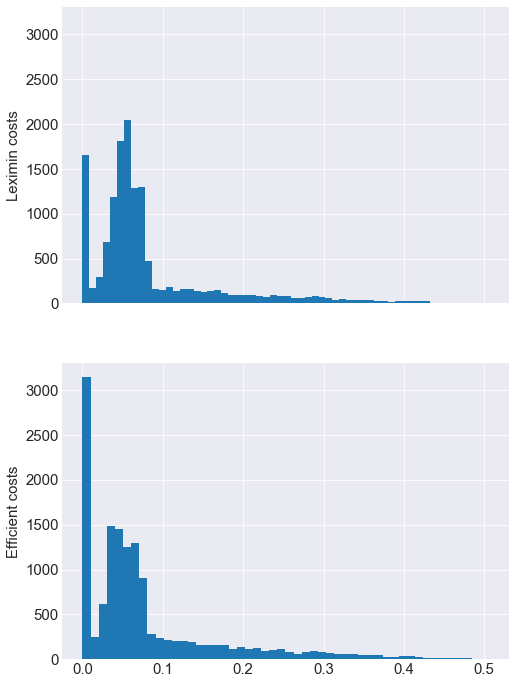

In [12]:
f, ax = plt.subplots(2, 1, figsize=(8, 12), sharex=True, sharey=True)

ax[0].hist(cost_increases, bins=50)
ax[0].set_ylabel('Leximin costs')

ax[1].hist(eff_cost_increases, bins=50)
ax[1].set_ylabel('Efficient costs')

plt.show()

In [13]:
print('Cost of fairness:')
cost_increases.sum() / eff_cost_increases.sum()

Cost of fairness:


1.0360585004223266

In [14]:
eff_cost_increases.max()

0.5050538149999999

In [15]:
cost_increases.max()

0.43200557499999986

In [16]:
leximin_cost = leximin_assigner.get_cost(
    assignments, cost_matrix=cost_matrix
)
leximin_cost

3667.7580394799797

In [17]:
eff_cost

3627.0456566409853

In [18]:
leximin_cost / eff_cost

1.0112246678683108